# **Case Study - Employee Attrition Prediction**

--------------------
## **Context**
--------------------

McCurr Health Consultancy is an MNC that has thousands of employees spread across the globe. The company believes in hiring the best talent available and retaining them for as long as possible. A huge amount of resources is spent on retaining existing employees through various initiatives. The Head of People Operations wants to bring down the cost of retaining employees. For this, he proposes limiting the incentives to only those employees who are at risk of attrition. As a recently hired Data Scientist in the People Operations Department, you have been asked to identify patterns in characteristics of employees who leave the organization. Also, you have to use this information to **predict if an employee is at risk of attrition.** This information will be used to target them with incentives.

-----------------------
## **Objective** 
-----------------------

* To identify the different factors that drive attrition
* To build a model to predict if an employee will attrite or not

------------------------------------
## **Dataset Description**
------------------------------------

The data contains information on employees' demographic details, work-related metrics, and attrition flag.

* **EmployeeNumber** - Unique Employee Identifier
* **Attrition** - Did the employee attrite or not?
* **Age** - Age of the employee
* **BusinessTravel** - Travel commitments for the job
* **DailyRate** - Data description not available
* **Department** - Employee's Department
* **DistanceFromHome** - Distance from work to home (in KM)
* **Education** - Employee's Education. 1-Below College, 2-College, 3-Bachelor, 4-Master, 5-Doctor
* **EducationField** - Field of Education
* **EnvironmentSatisfaction** - 1-Low, 2-Medium, 3-High, 4-Very High
* **Gender** - Employee's gender
* **HourlyRate** - Data description not available
* **JobInvolvement** - 1-Low, 2-Medium, 3-High, 4-Very High
* **JobLevel** - Level of job (1 to 5)
* **JobRole** - Job Roles
* **JobSatisfaction** - 1-Low, 2-Medium, 3-High, 4-Very High
* **MaritalStatus** - Marital Status
* **MonthlyIncome** - Monthly Salary
* **MonthlyRate** - Data description not available
* **NumCompaniesWorked** - Number of companies worked at
* **Over18** - Whether the employee is over 18 years of age?
* **OverTime** - Whether the employee is doing overtime?
* **PercentSalaryHike** - The percentage increase in the salary last year
* **PerformanceRating** - 1-Low, 2-Good, 3-Excellent, 4-Outstanding
* **RelationshipSatisfaction** - 1-Low, 2-Medium, 3-High, 4-Very High
* **StandardHours** - Standard Hours
* **StockOptionLevel** - Stock Option Level
* **TotalWorkingYears** - Total years worked
* **TrainingTimesLastYear** - Number of training attended last year
* **WorkLifeBalance** - 1-Low, 2-Good, 3-Excellent, 4-Outstanding
* **YearsAtCompany** - Years at Company
* **YearsInCurrentRole** - Years in the current role
* **YearsSinceLastPromotion** - Years since the last promotion
* **YearsWithCurrManager** - Years with the current manager

**In the real world, you will not find definitions for some of your variables. It is the part of the analysis to figure out what they might mean**.


## **Importing the libraries and overview of the dataset**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# To scale the data using z-score 
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

# Algorithms to use
from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import BaggingClassifier

from sklearn.ensemble import RandomForestClassifier

# Metrics to evaluate the model
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve,recall_score
from sklearn import tree


# For tuning the model
from sklearn.model_selection import GridSearchCV

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

### **Loading the Dataset**

In [3]:
# Loading the dataset
df = pd.read_excel('HR_Employee_Attrition_Dataset.xlsx')

In [4]:
df.head()

,EmployeeNumber,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,Yes,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,...,1,80,0,8,0,1,6,4,0,5
1,2,No,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,...,4,80,1,10,3,3,10,7,1,7
2,3,Yes,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,...,2,80,0,7,3,3,0,0,0,0
3,4,No,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,...,3,80,0,8,3,3,8,7,3,0
4,5,No,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2


### **Checking the info of the dataset**

In [5]:
# Let us see the info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   EmployeeNumber            2940 non-null   int64 
 1   Attrition                 2940 non-null   object
 2   Age                       2940 non-null   int64 
 3   BusinessTravel            2940 non-null   object
 4   DailyRate                 2940 non-null   int64 
 5   Department                2940 non-null   object
 6   DistanceFromHome          2940 non-null   int64 
 7   Education                 2940 non-null   int64 
 8   EducationField            2940 non-null   object
 9   EnvironmentSatisfaction   2940 non-null   int64 
 10  Gender                    2940 non-null   object
 11  HourlyRate                2940 non-null   int64 
 12  JobInvolvement            2940 non-null   int64 
 13  JobLevel                  2940 non-null   int64 
 14  JobRole                 

**Observations:**

- There are **2940 observations and 34 columns** in the dataset.
- All the columns have 2940 non-null values, i.e., **there are no missing values in the data.**

**Let's check the unique values in each column** 

In [6]:
# Checking unique values in each column
df.nunique()

EmployeeNumber              2940
Attrition                      2
Age                           43
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBalance                4
YearsAtCom

**Observations:**

- **Employee number is an identifier** which is unique for each employee and **we can drop this column** as it would not add any value to our analysis.
- **Over18 and StandardHours have only 1 unique value.** These columns will not add any value to our model hence we can drop them.
- Over18 and StandardHours have only 1 unique value. We can drop these columns as they will not add any value to our analysis.
- On the basis of number of unique values in each column and the data description, we can identify the continuous and categorical columns in the data.

**Let's drop the columns mentioned above** and define lists for numerical and categorical columns to explore them separately.

In [7]:
# Dropping the columns 
df=df.drop(['EmployeeNumber','Over18','StandardHours'],axis=1)

In [8]:
# Creating numerical columns
num_cols=['DailyRate','Age','DistanceFromHome','MonthlyIncome','MonthlyRate','PercentSalaryHike','TotalWorkingYears',
          'YearsAtCompany','NumCompaniesWorked','HourlyRate',
          'YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager','TrainingTimesLastYear']

# Creating categorical variables 
cat_cols= ['Attrition','OverTime','BusinessTravel', 'Department','Education', 'EducationField','JobSatisfaction','EnvironmentSatisfaction','WorkLifeBalance',
           'StockOptionLevel','Gender', 'PerformanceRating', 'JobInvolvement','JobLevel', 'JobRole', 'MaritalStatus','RelationshipSatisfaction']

## **Exploratory Data Analysis and Data Preprocessing**

### **Univariate analysis of numerical columns**



In [9]:
# Checking summary statistics
df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
DailyRate,2940.0,802.485714,403.440447,102.0,465.0,802.0,1157.0,1499.0
Age,2940.0,36.923810,9.133819,18.0,30.0,36.0,43.0,60.0
DistanceFromHome,2940.0,9.192517,8.105485,1.0,2.0,7.0,14.0,29.0
MonthlyIncome,2940.0,6502.931293,4707.155770,1009.0,2911.0,4919.0,8380.0,19999.0
MonthlyRate,2940.0,14313.103401,7116.575021,2094.0,8045.0,14235.5,20462.0,26999.0
PercentSalaryHike,2940.0,15.209524,3.659315,11.0,12.0,14.0,18.0,25.0
TotalWorkingYears,2940.0,11.279592,7.779458,0.0,6.0,10.0,15.0,40.0
YearsAtCompany,2940.0,7.008163,6.125483,0.0,3.0,5.0,9.0,40.0
NumCompaniesWorked,2940.0,2.693197,2.497584,0.0,1.0,2.0,4.0,9.0
HourlyRate,2940.0,65.891156,20.325969,30.0,48.0,66.0,84.0,100.0


**Observations:**

- **Average employee age is around 37 years**. It has a high range, from 18 years to 60, indicating good age diversity in the organization.
- **At least 50% of the employees live within a 7 KM radius** of the organization. However, there are some extreme values, given that the maximum value is 29 km.
- **The average monthly income of an employee is USD 6500.** It has a high range of values from 1K-20K USD, which is to be expected for any organization's income distribution. There is a big difference between the 3rd quartile value (around USD 8400) and the maximum value (nearly USD 20000), showing that the **company's highest earners have a disproportionately large income** in comparison to the rest of the employees. Again, this is fairly common in most organizations.
- **The average salary hike of an employee is around 15%.** At least 50% of employees got a salary hike of 14% or less, with the maximum salary hike being 25%.
- The average number of years an employee is associated with the company is 7. 
- **On average, the number of years since an employee got a promotion is ~2.19**. The majority of employees have been promoted since the last year.

**Let's explore these variables in some more depth by observing their distributions**

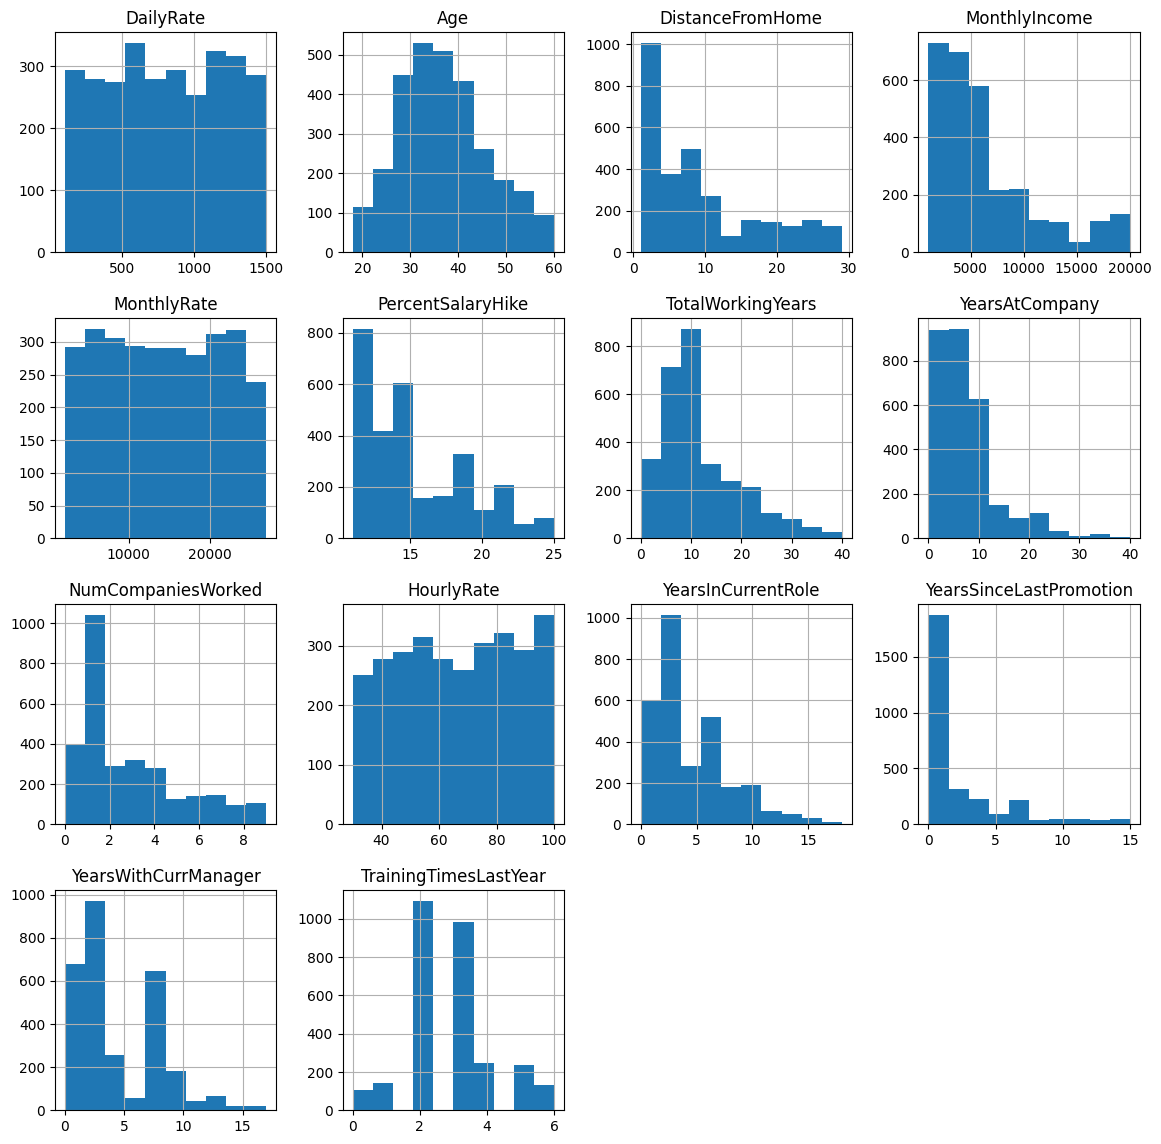

In [10]:
# Creating histograms
df[num_cols].hist(figsize=(14,14))
plt.show()

**Observations:**

- **The age distribution is close to a normal distribution** with the majority of employees between the ages of 25 and 50.

- **The percentage salary hike is skewed to the right**, implying that employees are obtaining smaller increases.

- **MonthlyIncome and TotalWorkingYears are skewed to the right**, indicating that the majority of workers are in entry / mid-level positions in the organization.

- **DistanceFromHome also has a right skewed distribution**, meaning most employees live close to work but there are a few that live further away.

- **On average, an employee has worked at 2.5 companies.** Most employees have worked at only 1 company.

- **The YearsAtCompany variable distribution shows a good proportion of workers with 10+ years**, indicating a significant number of loyal employees at the organization. 

- **The YearsInCurrentRole distribution has three peaks at 0, 2, and 7.** There are a few employees that have even stayed in the same role for 15 years and more.

- **The YearsSinceLastPromotion variable distribution indicates that some employees have not received a promotion in 10-15 years and are still working in the organization.** These employees are assumed to be high work-experience employees in upper-management roles, such as co-founders, C-suite employees etc.

- The distributions of DailyRate, HourlyRate and MonthlyRate appear to be uniform and do not provide much information. It could be that daily rate refers to the income earned per extra day worked while hourly rate could refer to the same concept applied for extra hours worked per day. Since these rates tend to be broadly similar for multiple employees in the same department, that explains the uniform distribution they show. 

### **Univariate analysis for categorical variables**

In [11]:
# Printing the % sub categories of each category
for i in cat_cols:
    print(df[i].value_counts(normalize=True))
    print('*'*40)

No     0.838776
Yes    0.161224
Name: Attrition, dtype: float64
****************************************
No     0.717007
Yes    0.282993
Name: OverTime, dtype: float64
****************************************
Travel_Rarely        0.709524
Travel_Frequently    0.188435
Non-Travel           0.102041
Name: BusinessTravel, dtype: float64
****************************************
Research & Development    0.653741
Sales                     0.303401
Human Resources           0.042857
Name: Department, dtype: float64
****************************************
3    0.389116
4    0.270748
2    0.191837
1    0.115646
5    0.032653
Name: Education, dtype: float64
****************************************
Life Sciences       0.412245
Medical             0.315646
Marketing           0.108163
Technical Degree    0.089796
Other               0.055782
Human Resources     0.018367
Name: EducationField, dtype: float64
****************************************
4    0.312245
3    0.300680
1    0.196599
2    0.

**Observations:**

- **The employee attrition rate is 16%.**
- **Around 28% of the employees are working overtime.** This number appears to be on the higher side, and might indicate a stressed employee work-life.
- 71% of the employees have traveled rarely, while around 19% have to travel frequently.
- Around 73% of the employees come from an educational background in the Life Sciences and Medical fields. 
- Over 65% of employees work in the Research & Development department of the organization.
- **Nearly 40% of the employees have low (1) or medium-low (2) job satisfaction and environment satisfaction** in the organization, indicating that the morale of the company appears to be somewhat low.
- **Over 30% of the employees show low (1) to medium-low (2) job involvement.** 
- Over 80% of the employees either have none or very less stock options. 
- **In terms of performance ratings, none of the employees have rated lower than 3 (excellent).** About 85% of employees have a performance rating equal to 3 (excellent), while the remaining have a rating of 4 (outstanding). This could either mean that the majority of employees are top performers, or  the more likely scenario is that the organization could be highly lenient with its performance appraisal process.

### **Bivariate and Multivariate analysis**
We have analyzed different categorical and numerical variables. Let's now check how does attrition rate is related with other categorical variables.

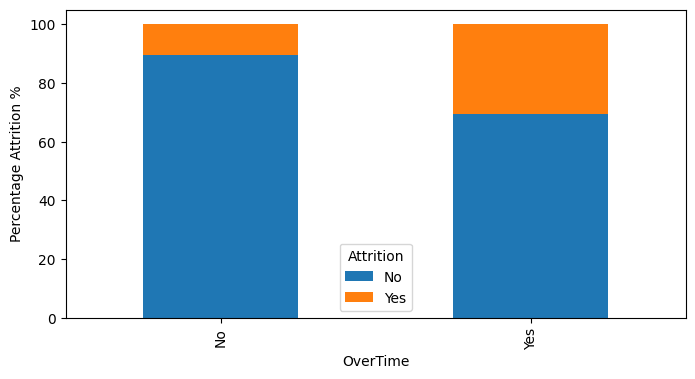

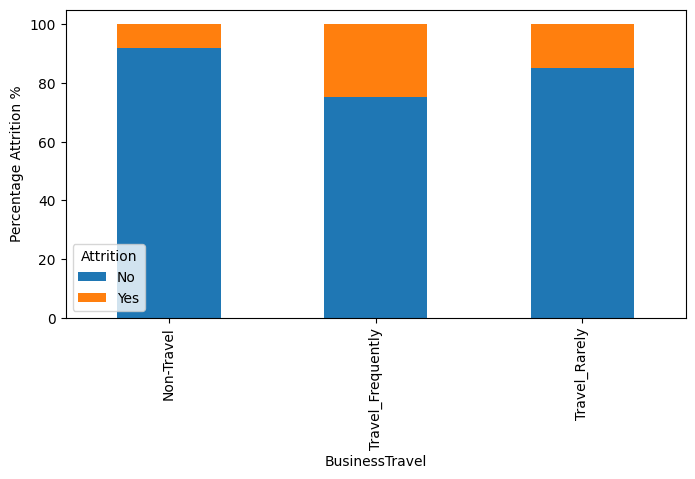

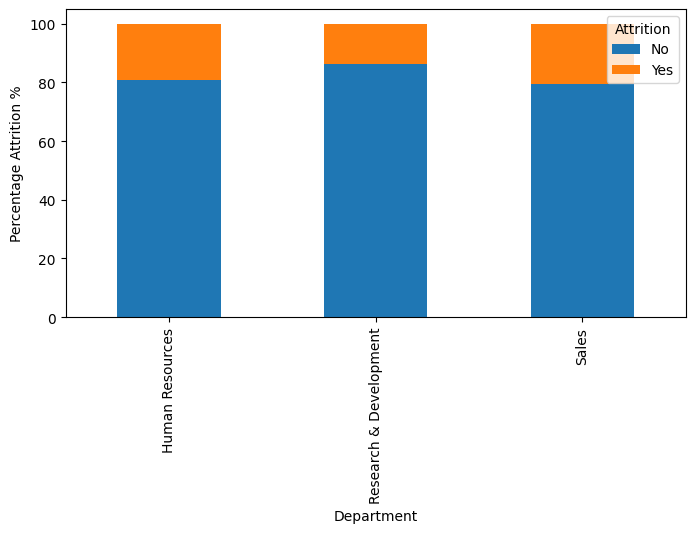

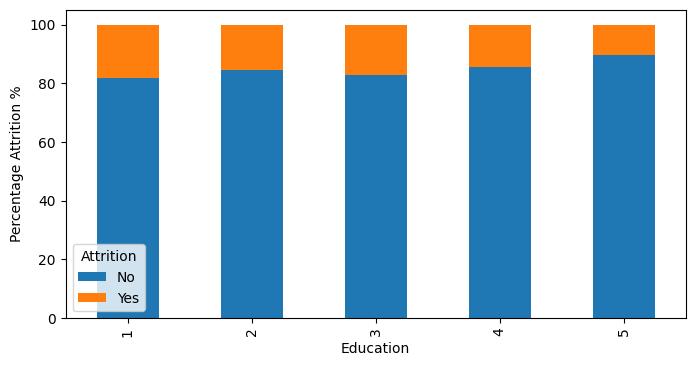

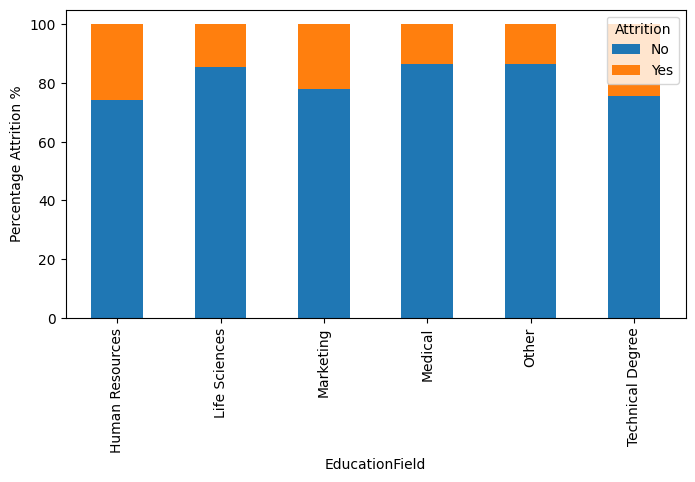

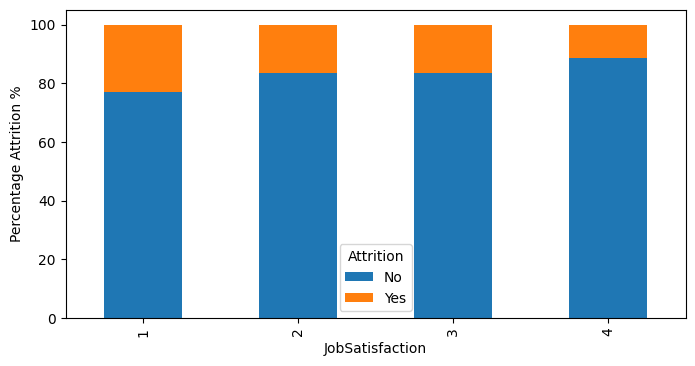

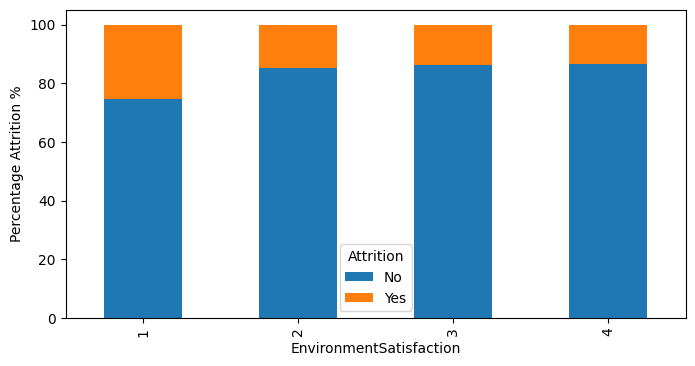

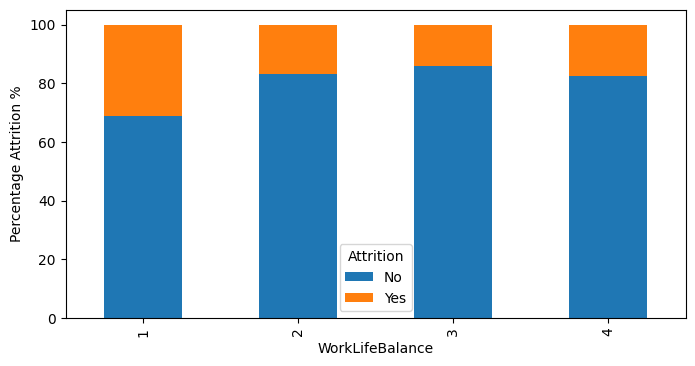

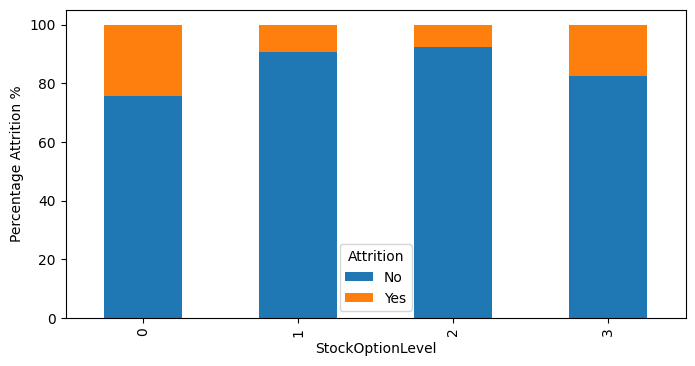

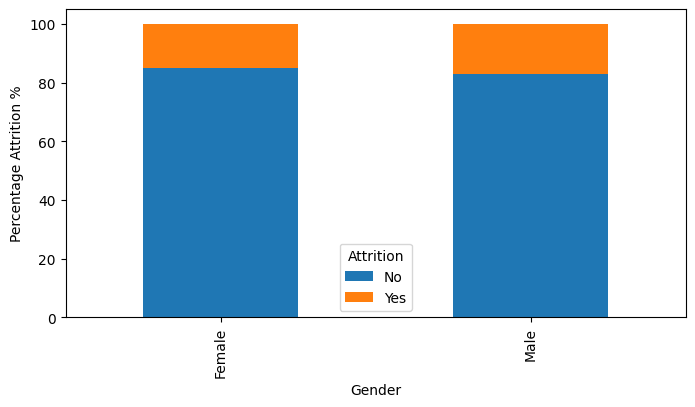

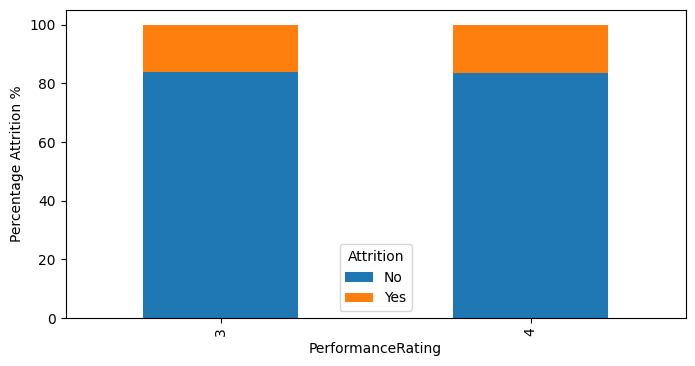

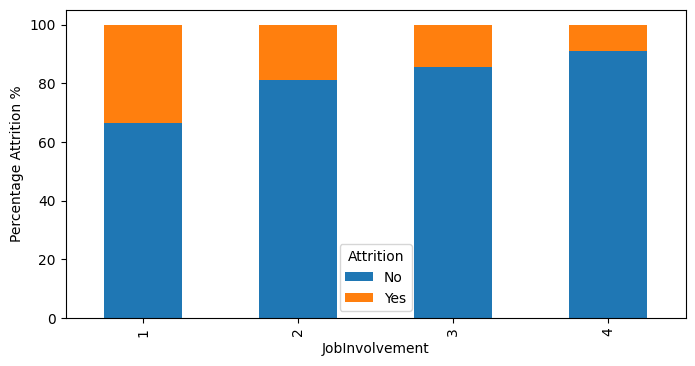

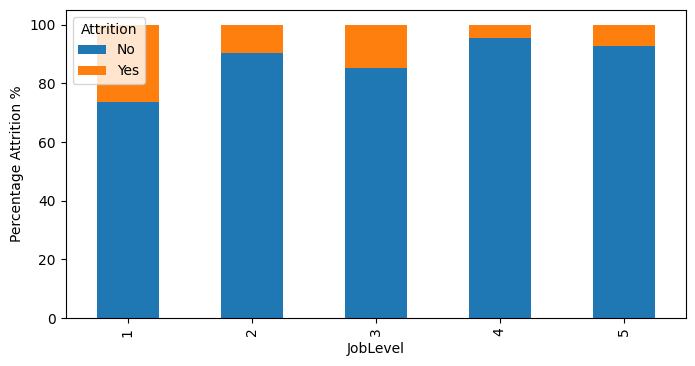

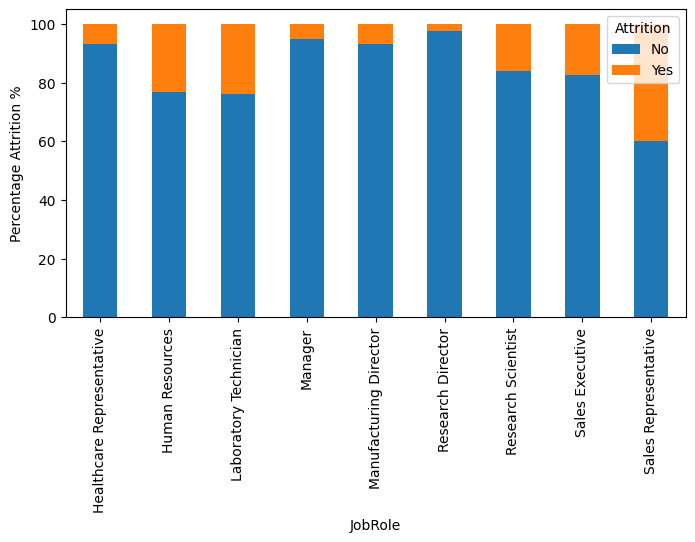

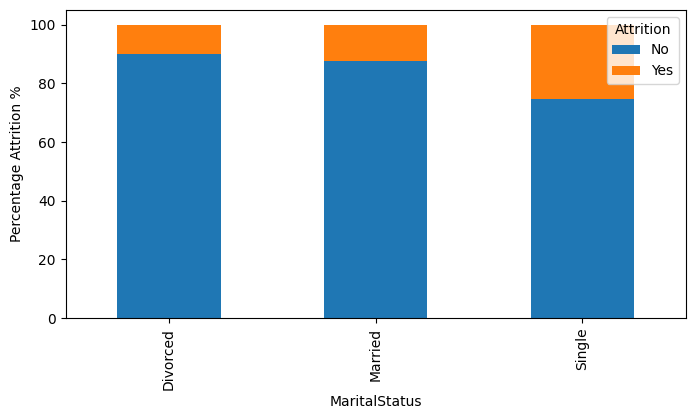

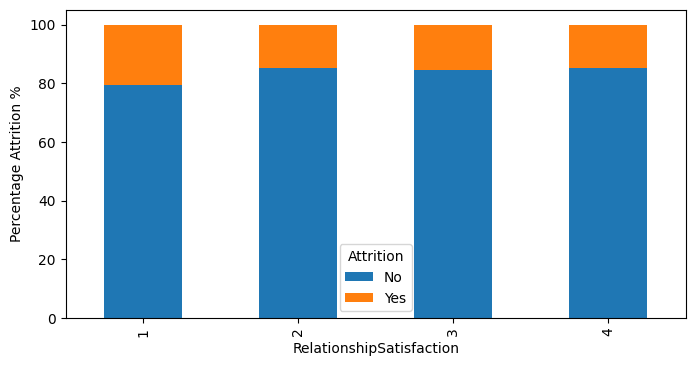

In [12]:
for i in cat_cols:
    if i!='Attrition':
        (pd.crosstab(df[i],df['Attrition'],normalize='index')*100).plot(kind='bar',figsize=(8,4),stacked=True)
        plt.ylabel('Percentage Attrition %')

**Observations:**
    
- **Employees working overtime have more than a 30% chance of attrition**, 
which is very high compared to the 10% chance of attrition for employees who do not work extra hours.
- As seen earlier, the majority of employees work for the R&D department. The chance of attrition there is ~15%
- **Employees working as sales representatives have an attrition rate of around 40%** while HRs and Technicians have an attrition rate of around 25%. The sales and HR departments have higher attrition rates in comparison to an academic department like Research & Development, an observation that makes intuitive sense keeping in mind the differences in those job profiles. The high-pressure and incentive-based nature of Sales and Marketing roles may be contributing to their higher attrition rates.
- **The lower the employee's job involvement, the higher their attrition chances appear to be, with 1-rated JobInvolvement employees attriting at 35%.** The reason for this could be that employees with lower job involvement might feel left out or less valued and have already started to explore new options, leading to a higher attrition rate.
- **Employees at a lower job level also attrite more,** with 1-rated JobLevel employees showing a nearly 25% chance of attrition. These may be young employees who tend to explore more options in the initial stages of their careers. 
- **A low work-life balance rating clearly leads employees to attrite**, 30% of those in the 1-rated category show attrition.

**Let's check the relationship between attrition and Numerical variables**

In [13]:
# Mean of numerical variables grouped by attrition
df.groupby(['Attrition'])[num_cols].mean()

,DailyRate,Age,DistanceFromHome,MonthlyIncome,MonthlyRate,PercentSalaryHike,TotalWorkingYears,YearsAtCompany,NumCompaniesWorked,HourlyRate,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,TrainingTimesLastYear
Attrition,,,,,,,,,,,,,,
No,812.504461,37.561233,8.915653,6832.739659,14265.779400,15.231144,11.862936,7.369019,2.645580,65.952149,4.484185,2.234388,4.367397,2.832928
Yes,750.362869,33.607595,10.632911,4787.092827,14559.308017,15.097046,8.244726,5.130802,2.940928,65.573840,2.902954,1.945148,2.852321,2.624473


**Observations:**
- **Employees leaving the company have a nearly 30% lower average income and 30% lesser work experience than those who are not.** These could be the employees looking to explore new options and/or increase their salary with a company switch. 
- **Employees showing attrition also tend to live 16% further from the office than those who are not**. The longer commute to and from work could mean they have to spend more time/money every day, and this could be leading to job dissatisfaction and wanting to leave the organization.

**We have found out what kind of employees are leaving the company.**

### **Let's check the relationship between different numerical variables**

<Axes: >

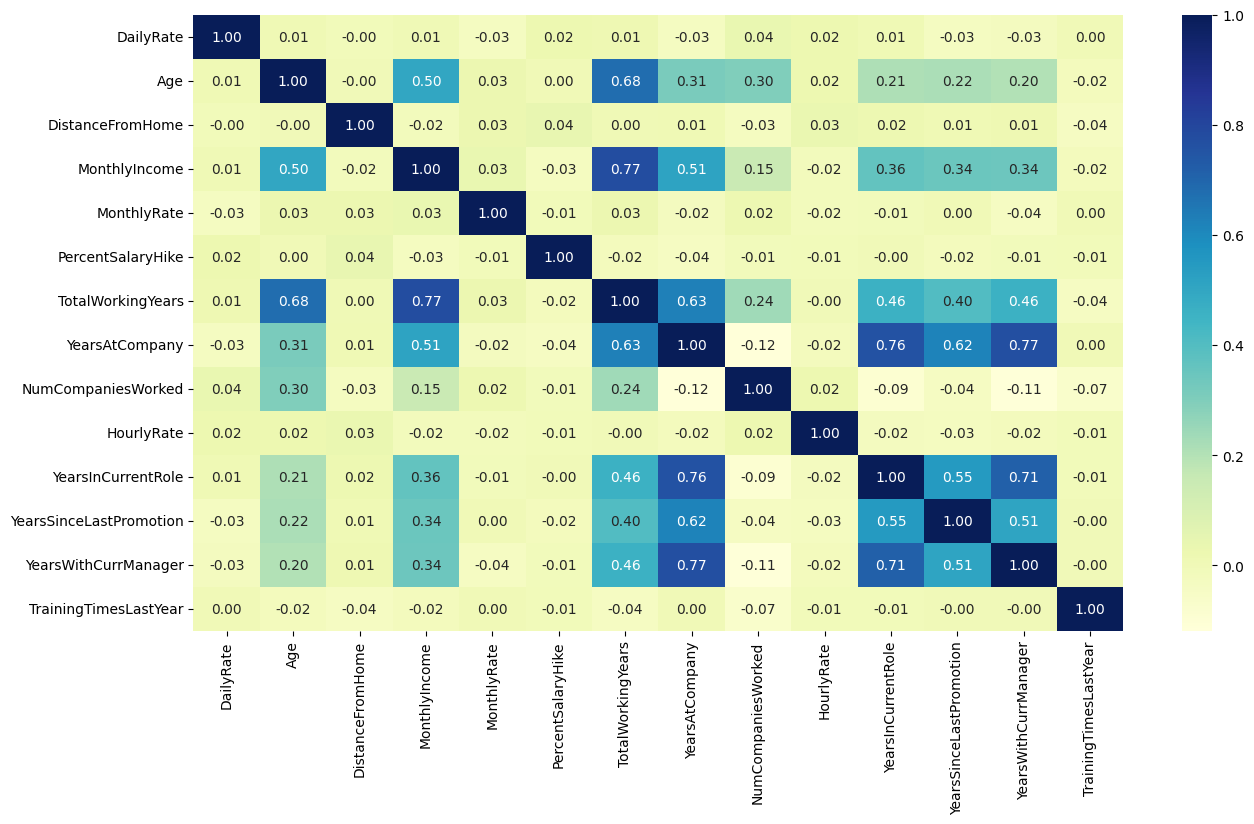

In [14]:
# Plotting the correlation between numerical variables
plt.figure(figsize=(15,8))
sns.heatmap(df[num_cols].corr(),annot=True, fmt='0.2f', cmap='YlGnBu')

**Observations:**

- **Total work experience, monthly income, years at company and years with current manager are highly correlated with each other and with employee age** which is easy to understand as these variables show an increase with age for most employees. 
- Years at company and years in current role are correlated with years since last promotion which means that the company is not giving promotions at the right time.

**Now we have explored our data. Let's build the model**

## **Model Building - Approach**

1. Data preparation.
2. Partition the data into a train and test set.
3. Build a model on the train data.
4. Tune the model if required.
5. Test the data on the test set.

### **Data preparation**

**Creating dummy variables for categorical Variables**

In [15]:
# Creating list of dummy columns
to_get_dummies_for = ['BusinessTravel', 'Department','Education', 'EducationField','EnvironmentSatisfaction', 'Gender',  'JobInvolvement','JobLevel', 'JobRole', 'MaritalStatus' ]

# Creating dummy variables
df = pd.get_dummies(data = df, columns = to_get_dummies_for, drop_first = True)      

# Mapping overtime and attrition
dict_OverTime = {'Yes': 1, 'No':0}
dict_attrition = {'Yes': 1, 'No': 0}


df['OverTime'] = df.OverTime.map(dict_OverTime)
df['Attrition'] = df.Attrition.map(dict_attrition)

**Separating the independent variables (X) and the dependent variable (Y)**

In [16]:
# Separating target variable and other variables

Y= df.Attrition
X= df.drop(columns = ['Attrition'])

**Splitting the data into 70% train and 30% test set**

Some classification problems can exhibit a large imbalance in the distribution of the target classes: for instance there could be several times more negative samples than positive samples. In such cases it is recommended to use the **stratified sampling** technique to ensure that relative class frequencies are approximately preserved in each train and validation fold.

In [17]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1, stratify = Y)

### **Scaling the data**

The independent variables in this dataset have different scales. When features have different scales from each other, there is a chance that a higher weightage will be given to features that have a higher magnitude, and they will dominate over other features whose magnitude changes may be smaller but whose percentage changes may be just as significant or even larger. This will impact the performance of our machine learning algorithm, and we do not want our algorithm to be biased towards one feature. 

The solution to this issue is **Feature Scaling**, i.e. scaling the dataset so as to give every transformed variable a comparable scale.

Tree based models such as **Decision Trees** and **Random Forest** does not require feature scaling to be performed as they are not sensitive to the variance in the data.

We will scale the data for **Logistic Regression** and **SVM**.  We will use the **Standard Scaler** method, which centers and scales the dataset using the Z-Score. It standardizes features by subtracting the mean and scaling it to have unit variance. The standard score of sample x is calculated as:

> **z = (x - u) / s**

where **u** is the mean of the training samples (zero) and **s** is the standard deviation of the training samples.

In [18]:
# Scaling the data
sc=StandardScaler()

# Fit_transform on train data
X_train_scaled=sc.fit_transform(X_train)
X_train_scaled=pd.DataFrame(X_train_scaled, columns=X.columns)

# Transform on test data
X_test_scaled=sc.transform(X_test)
X_test_scaled=pd.DataFrame(X_test_scaled, columns=X.columns)

### **Model evaluation criterion**

**The model can make two types of wrong predictions:**

1. Predicting an employee will attrite when the employee doesn't attrite
2. Predicting an employee will not attrite when the employee actually attrites

**Which case is more important?**

* **Predicting that the employee will not attrite but the employee attrites**, i.e., losing out on a valuable employee or asset. This would be considered a major miss for any employee attrition predictor and hence the more important case of wrong predictions.

**How to reduce this loss i.e the need to reduce False Negatives?**
* **The company would want the Recall to be maximized**, the greater the Recall, the higher the chances of minimizing false negatives. Hence, the focus should be on increasing the Recall (minimizing the false negatives) or, in other words, identifying the true positives (i.e. Class 1) very well, so that the company can provide incentives to control the attrition rate especially, for top-performers. This would help in optimizing the overall project cost towards retaining the best talent.

**Also, let's create a function to calculate and print the classification report and confusion matrix so that we don't have to rewrite the same code repeatedly for each model.**

In [19]:
# Creating metric function 
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Not Attrite', 'Attrite'], yticklabels=['Not Attrite', 'Attrite'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

## **Building the model**

We will be building 4 different models:

- **Logistic Regression**
- **Support Vector Machine(SVM)**
- **Decision Tree**
- **Random Forest**


### **Logistic Regression Model**

- Logistic Regression is a supervised learning algorithm which is used for **binary classification problems** i.e. where the dependent variable is categorical and has only two possible values. In logistic regression, we use the sigmoid function to calculate the probability of an event y, given some features x as:

                                          P(y)=1/exp(1 + exp(-x))

In [20]:
# Fitting logistic regression model

lg=LogisticRegression()
lg.fit(X_train_scaled,y_train)

LogisticRegression()

**Let's check the model performance**

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      1726
           1       0.81      0.50      0.62       332

    accuracy                           0.90      2058
   macro avg       0.86      0.74      0.78      2058
weighted avg       0.89      0.90      0.89      2058



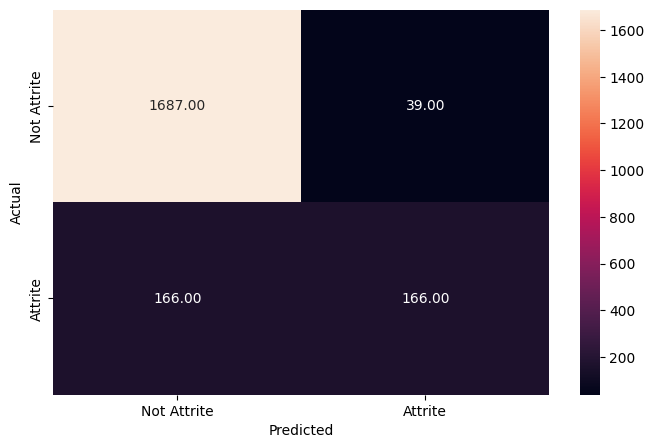

In [21]:
# Checking the performance on the training data
y_pred_train = lg.predict(X_train_scaled)

metrics_score(y_train, y_pred_train)

- The reported average includes the macro average which averages the unweighted mean per label, and the weighted average i.e. averaging the support-weighted mean per label.
- In classification, the class of interest is considered the positive class. Here, the class of interest is 1 i.e. identifying the employees at risk of attrition.

**Reading the confusion matrix (clockwise):**

* True Negative (Actual=0, Predicted=0): Model predicts that an employee would not attrite and the employee does not attrite 

* False Positive (Actual=0, Predicted=1): Model predicts that an employee would attrite but the employee does not attrite

* False Negative (Actual=1, Predicted=0): Model predicts that an employee would not attrite but the employee attrites

* True Positive (Actual=1, Predicted=1): Model predicts that an employee would attrite and the employee actually attrites

              precision    recall  f1-score   support

           0       0.90      0.97      0.94       740
           1       0.76      0.46      0.58       142

    accuracy                           0.89       882
   macro avg       0.83      0.72      0.76       882
weighted avg       0.88      0.89      0.88       882



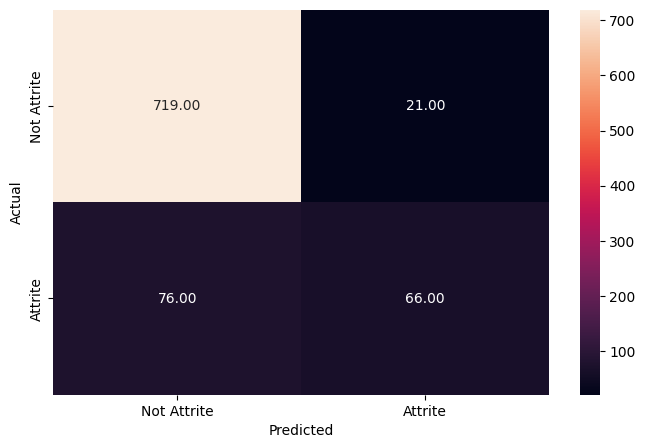

In [22]:
# Checking the performance on the test dataset
y_pred_test = lg.predict(X_test_scaled)

metrics_score(y_test, y_pred_test)

**Observations:**
- **We are getting an accuracy of around 90%** on train and test dataset.
- However, **the recall for this model is only around 50% for class 1 on train and 46% on test.**
- As the recall is low, **this model will not perform well** in differentiating out those employees who have a high chance of leaving the company, meaning it will eventually not help in reducing the attrition rate. 
- As we can see from the Confusion Matrix, **this model fails to identify the majority of employees who are at risk of attrition.**

**Let's check the coefficients and find which variables are leading to attrition and which can help to reduce the attrition**

In [23]:
# Printing the coefficients of logistic regression
cols=X.columns

coef_lg=lg.coef_

pd.DataFrame(coef_lg,columns=cols).T.sort_values(by = 0,ascending = False)

,0
OverTime,0.959309
BusinessTravel_Travel_Frequently,0.715550
MaritalStatus_Single,0.614826
YearsSinceLastPromotion,0.547480
YearsAtCompany,0.519314
NumCompaniesWorked,0.499629
Department_Sales,0.483409
Department_Research & Development,0.481904
BusinessTravel_Travel_Rarely,0.440191
DistanceFromHome,0.385265


**Observations:**


Features which **positively affect** on the attrition rate are:
- OverTime	
- BusinessTravel_Travel_Frequently	
- Department_Research & Development	
- JobRole_Sales Executive	
- MaritalStatus_Single	
- Department_Sales	
- NumCompaniesWorked	
- YearsSinceLastPromotion
- JobLevel_5	
- BusinessTravel_Travel_Rarely
- DistanceFromHome
- YearsAtCompany	
- JobRole_Human Resources	
- JobRole_Sales Representative

Features which **negatively affect** on the attrition rate are:
- MonthlyIncome	
- JobInvolvement_3	
- JobLevel_2	
- EnvironmentSatisfaction_4	
- JobInvolvement_4	
- JobInvolvement_2	
- EnvironmentSatisfaction_3	
- EducationField_Life Sciences	
- EnvironmentSatisfaction_2	
- YearsWithCurrManager	
- JobRole_Research Director	
- TotalWorkingYears	
- JobSatisfaction	

**Observations:**

- Based on the Logistic Regression model, **Overtime is the most important feature** in detecting whether an employee would attrite or not.
- **This model also suggests that attrition is dependent on the employee's department.** Belonging to Sales or HR is shown to have a higher attrition rate which is understood, but the model also seems to suggest belonging to R&D contributes to a higher attrition rate, which is counter-intuitive. This could be because more than 65% of the employees are working in R&D, so the absolute number of employees who attrite from the company working in R&D will be significant even with a lower percentage. This is an example of the Simpson's paradox, and is evidence that a more powerful non-linear model may be necessary to accurately map the relationship between Department_Research & Development and the target variable. 
- **Business traveling is an important variable in predicting the attrition rate.** Employees who either travel a lot or travel rarely have high attrition rate. This could be because those who travel often might feel overworked and dissatisfied with their role, whereas employees traveling rarely (in an organization where nearly 90% of all employees are traveling) could be a sign of them feeling undervalued and disinterested and hence attriting more.
- **The number of companies the employee has worked for in the past also appears to impact the likelihood of attrition** - the greater the number the higher the chance the employee will attrite. This suggests that employees who have worked for a higher number of companies may probably not stay loyal and may continue switching companies.
- Other features which appear to affect the chances of attrition are the number of years at the current company and the distance from home, both with positive correlations to attrition likelihood.
- The Job Involvement features being negatively correlated with attrition signify that **employees who are more involved in their jobs tend to attrite less.** This could probably be because a high degree of job involvement might make employees feel they are more important to the company, and hence discourage them from attrition.
- The model also captures the **inverse relation between income and attrition** - suggesting attrition rates can be controlled by increasing employee salary.
-  **Employees who are satisfied with the environment and culture of the organization show a lower chance of attrition**, a conclusion that makes sense since a good work environment is likely to keep employees happy and prevent them from attriting.
- **Employees with higher total work experience and a good position in the organization are also less likely to attrite**, probably because working at the organization for several years and/or occupying a good position tends to promote job stability and discourages volatility.

The coefficients of the **logistic regression** model give us the **log of odds**, which is hard to interpret in the real world. We can convert the **log of odds into real odds** by taking its exponential.

In [24]:
# Finding the odds
odds = np.exp(lg.coef_[0]) 

# Adding the odds to a dataframe and sorting the values
pd.DataFrame(odds, X_train_scaled.columns, columns = ['odds']).sort_values(by ='odds', ascending = False) 

,odds
OverTime,2.609893
BusinessTravel_Travel_Frequently,2.045312
MaritalStatus_Single,1.849334
YearsSinceLastPromotion,1.728891
YearsAtCompany,1.680873
NumCompaniesWorked,1.648110
Department_Sales,1.621594
Department_Research & Development,1.619154
BusinessTravel_Travel_Rarely,1.553004
DistanceFromHome,1.470003


**Observations**
- The odds of an employee working overtime to attrite are **2.6 times** the odds of one who is not, probably due to the fact that working overtime is not sustainable for an extended duration for any employee, and may lead to burnout and job dissatisfaction.
- The odds of an employee traveling frequently to attrite are **double** the odds of an employee who doesn't travel as often.
- The odds of single employees attriting are **1.8 times (80% higher than)** the odds of an employee with another marital status.

### **Precision-Recall Curve for logistic regression**

**Precision-Recall curves summarize the trade-off between the true positive rate and the positive predictive value for a predictive model using different probability thresholds.**

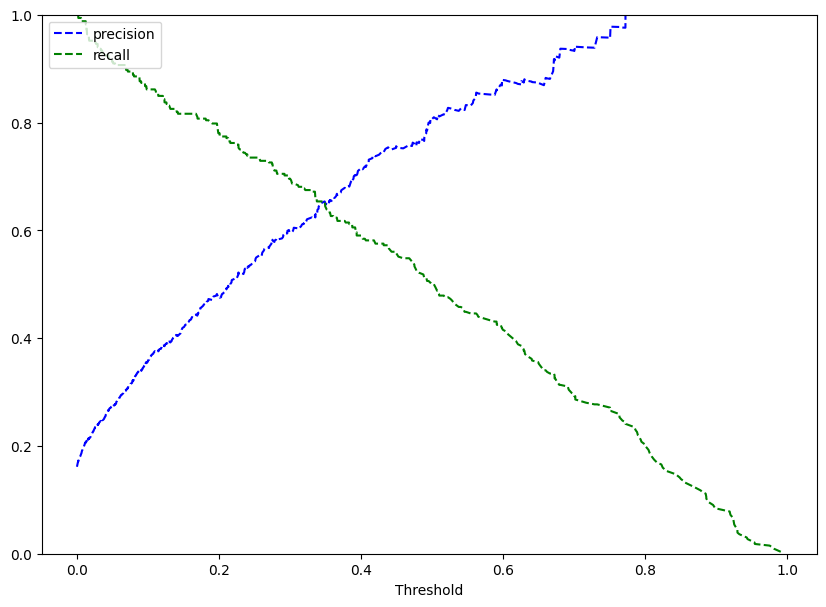

In [25]:
# Predict_proba gives the probability of each observation belonging to each class
y_scores_lg=lg.predict_proba(X_train_scaled)

precisions_lg, recalls_lg, thresholds_lg = precision_recall_curve(y_train, y_scores_lg[:,1])

# Plot values of precisions, recalls, and thresholds
plt.figure(figsize=(10,7))
plt.plot(thresholds_lg, precisions_lg[:-1], 'b--', label='precision')
plt.plot(thresholds_lg, recalls_lg[:-1], 'g--', label = 'recall')
plt.xlabel('Threshold')
plt.legend(loc='upper left')
plt.ylim([0,1])
plt.show()

**Observation:**
- We can see that precision and recall are balanced for a threshold of about ~**0.35**.

**Let's find out the performance of the model at this threshold**

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1726
           1       0.65      0.64      0.64       332

    accuracy                           0.89      2058
   macro avg       0.79      0.79      0.79      2058
weighted avg       0.89      0.89      0.89      2058



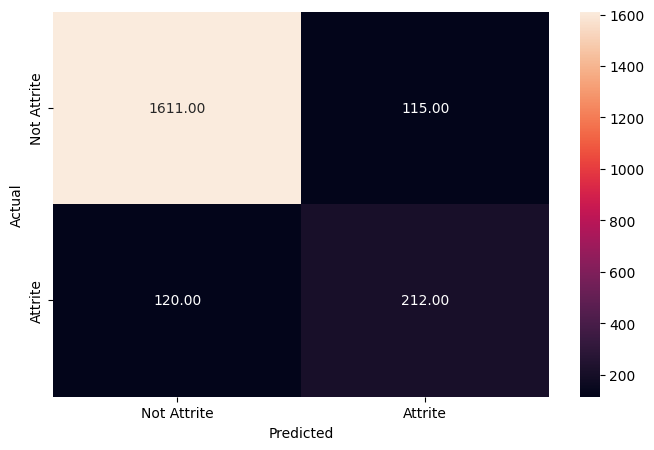

In [26]:
optimal_threshold=.35
y_pred_train = lg.predict_proba(X_train_scaled)

metrics_score(y_train, y_pred_train[:,1]>optimal_threshold)

**Observations**
- **The model performance has improved. The recall has increased significantly for class 1.**
- Let's check the performance on the test data.

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       740
           1       0.62      0.63      0.63       142

    accuracy                           0.88       882
   macro avg       0.78      0.78      0.78       882
weighted avg       0.88      0.88      0.88       882



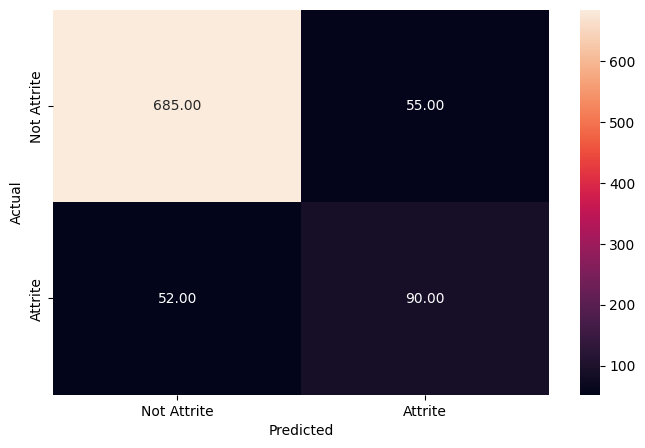

In [27]:
optimal_threshold=.35
y_pred_test = lg.predict_proba(X_test_scaled)

metrics_score(y_test, y_pred_test[:,1]>optimal_threshold)

**Observation:**
- The model is giving **similar performance on the test and train data** i.e. the model is giving a generalized performance.
- **The recall of the test data has increased significantly** while at the same time, the precision has decreased, which is to be expected while adjusting the threshold.
- The average recall and precision for the model are good but let's see if we can get better performance using other algorithms. 

### **Support Vector Machines**

Let's build the models using the two of the widely used kernel functions:

1.   **Linear Kernel**
2.   **RBF Kernel**

#### **Linear Kernel**

In [28]:
# Fitting SVM
svm = SVC(kernel='linear') # Linear kernal or linear decision boundary
model = svm.fit(X= X_train_scaled, y = y_train)

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      1726
           1       0.81      0.50      0.62       332

    accuracy                           0.90      2058
   macro avg       0.86      0.74      0.78      2058
weighted avg       0.89      0.90      0.89      2058



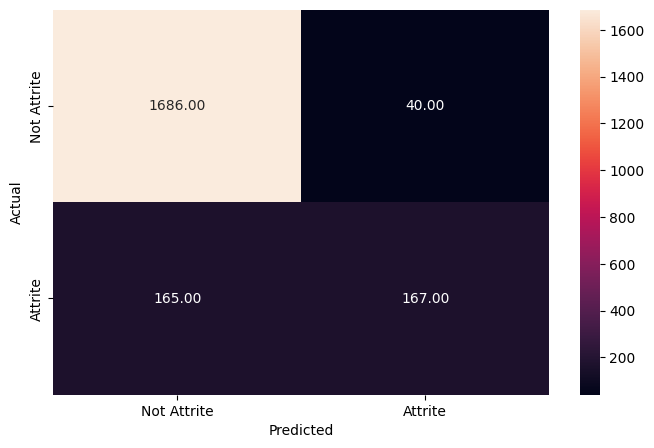

In [29]:
y_pred_train_svm = model.predict(X_train_scaled)

metrics_score(y_train, y_pred_train_svm)

              precision    recall  f1-score   support

           0       0.90      0.97      0.94       740
           1       0.76      0.44      0.56       142

    accuracy                           0.89       882
   macro avg       0.83      0.71      0.75       882
weighted avg       0.88      0.89      0.88       882



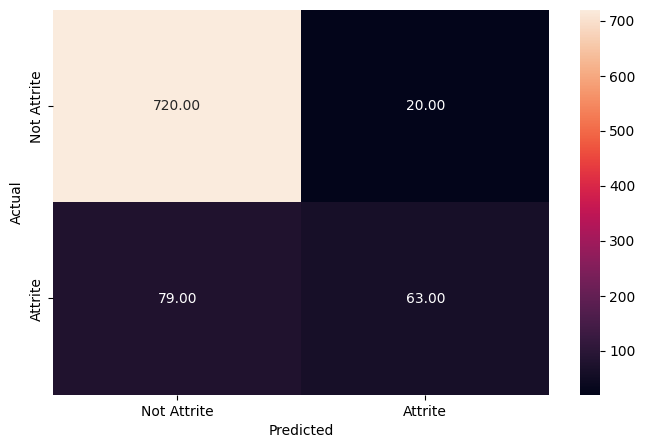

In [30]:
# Checking performance on the test data
y_pred_test_svm = model.predict(X_test_scaled)

metrics_score(y_test, y_pred_test_svm)

* SVM model with **linear kernel** is not overfitting as the accuracy is around 90% for both train and test dataset
* The **Recall** for the model is around 50% implying that our model will not correctly predict the employees who are at risk of attrition


#### **RBF Kernel**

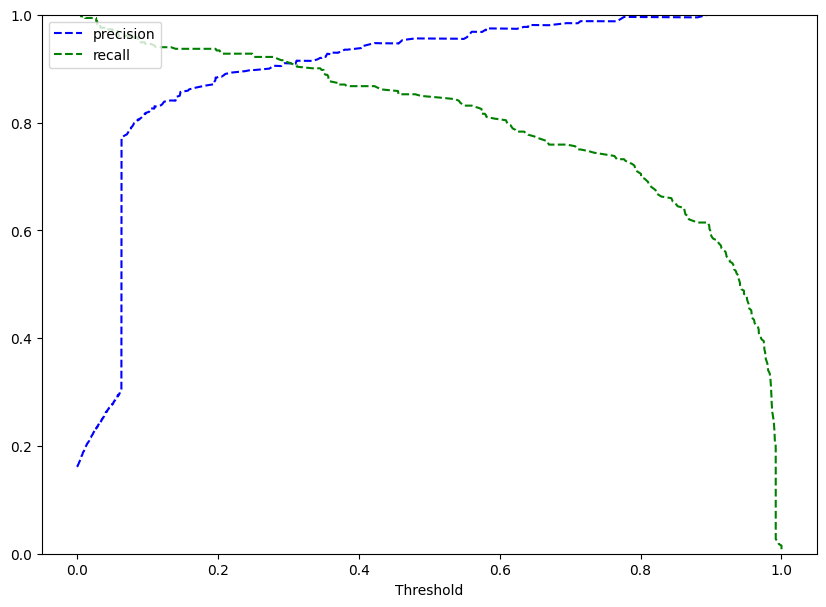

In [31]:
svm_rbf=SVC(kernel='rbf',probability=True)
# Fit the model
svm_rbf.fit(X_train_scaled,y_train)
# Predict on train data
y_scores_svm=svm_rbf.predict_proba(X_train_scaled)

precisions_svm, recalls_svm, thresholds_svm = precision_recall_curve(y_train, y_scores_svm[:,1])

# Plot values of precisions, recalls, and thresholds
plt.figure(figsize=(10,7))
plt.plot(thresholds_svm, precisions_svm[:-1], 'b--', label='precision')
plt.plot(thresholds_svm, recalls_svm[:-1], 'g--', label = 'recall')
plt.xlabel('Threshold')
plt.legend(loc='upper left')
plt.ylim([0,1])
plt.show()

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1726
           1       0.92      0.90      0.91       332

    accuracy                           0.97      2058
   macro avg       0.95      0.94      0.95      2058
weighted avg       0.97      0.97      0.97      2058



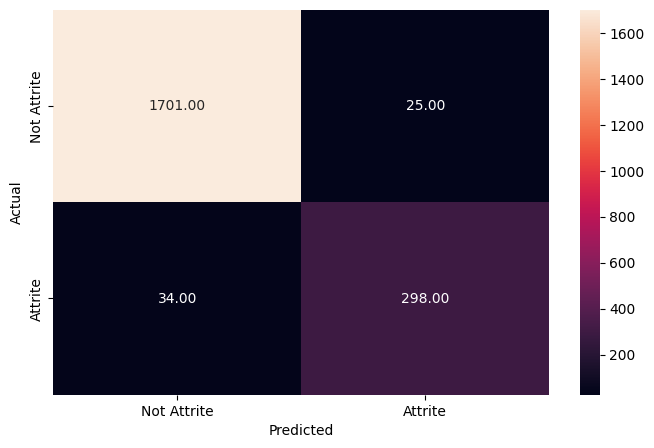

In [32]:
optimal_threshold_svm=.35
y_pred_train = svm_rbf.predict_proba(X_train_scaled)

metrics_score(y_train, y_pred_train[:,1]>optimal_threshold_svm)

              precision    recall  f1-score   support

           0       0.96      0.95      0.96       740
           1       0.75      0.82      0.78       142

    accuracy                           0.93       882
   macro avg       0.86      0.88      0.87       882
weighted avg       0.93      0.93      0.93       882



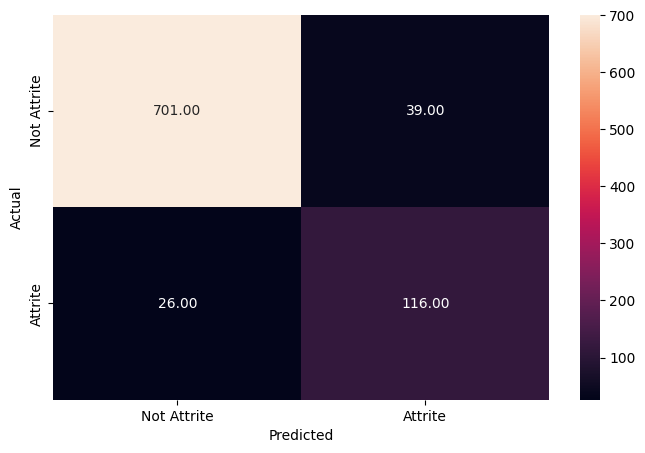

In [33]:
optimal_threshold_svm=.35
y_pred_test = svm_rbf.predict_proba(X_test_scaled)
metrics_score(y_test, y_pred_test[:,1]>optimal_threshold_svm)

* At the optimal threshold of .35, the model performance has improved significantly. The recall has improved from 0.44 to .82 which is a ~40% increase and the model is giving good generalized results. 
* Moreover, the kernel used is rbf, so the model performs well with a non-linear kernel.
* As the recall is high, **this model will perform well** in differentiating out those employees who have a high chance of leaving the company, meaning it will eventually help in reducing the attrition rate. 

### **Decision Tree**

* We will build our model using the **DecisionTreeClassifier function.** 
* If the frequency of class A is 17% and the frequency of class B is 83%, then class B will become the dominant class and **the decision tree will become biased toward the dominant class.**
* **class_weight is a hyperparameter** for the decision tree classifier, and in this case, we can pass a dictionary {0:0.17, 1:0.83} to the model to specify the weight of each class and the decision tree will give more weightage to class 1.

In [34]:
# Building decision tree model
dt = DecisionTreeClassifier(class_weight = {0: 0.17, 1: 0.83}, random_state = 1)

In [35]:
# Fitting decision tree model
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.17, 1: 0.83}, random_state=1)

**Let's check the model performance of decision tree**

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1726
           1       1.00      1.00      1.00       332

    accuracy                           1.00      2058
   macro avg       1.00      1.00      1.00      2058
weighted avg       1.00      1.00      1.00      2058



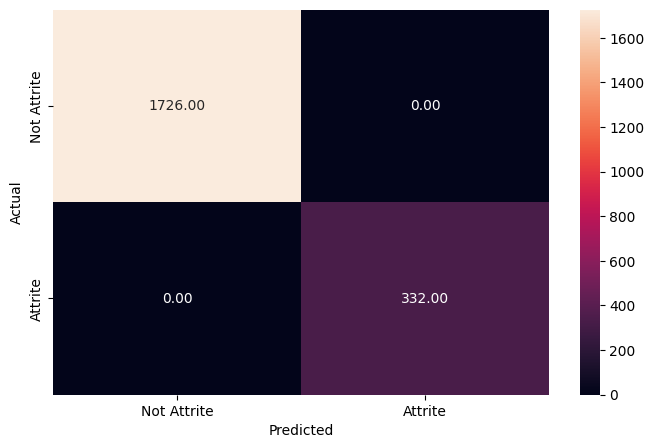

In [36]:
# Checking performance on the training dataset
y_train_pred_dt = dt.predict(X_train)

metrics_score(y_train, y_train_pred_dt)

**Observation:**

- The Decision tree is giving a **100% score for all metrics on the training dataset.**

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       740
           1       0.73      0.80      0.77       142

    accuracy                           0.92       882
   macro avg       0.85      0.87      0.86       882
weighted avg       0.92      0.92      0.92       882



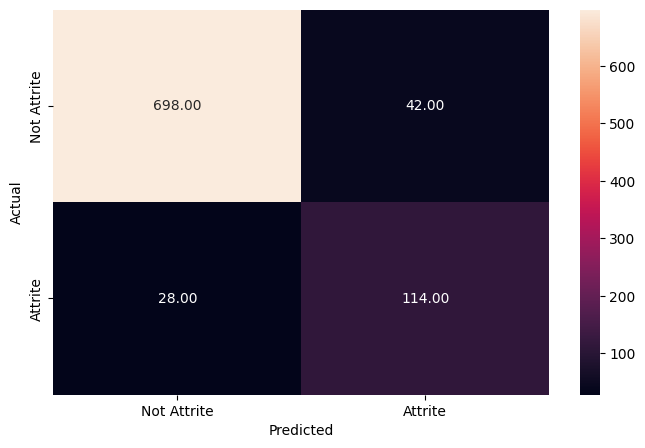

In [37]:
# Checking performance on the test dataset
y_test_pred_dt = dt.predict(X_test)

metrics_score(y_test, y_test_pred_dt)

**Observations:**

- The Decision Tree works well on the training data but **not so well on the test data** as the recall is 0.80 in comparison to 1 for the training dataset, i.e., the Decision Tree is overfitting the training data.
- The precision on the test data suggests that there's a 27% (1 - 0.73) chance that the model will predict that a person is going to leave even though he/she would not, and **the company may waste their time and energy on these employees who are not at risk of attrition.**

**Let's plot the feature importance and check the most important features.**

<Axes: xlabel='Importance'>

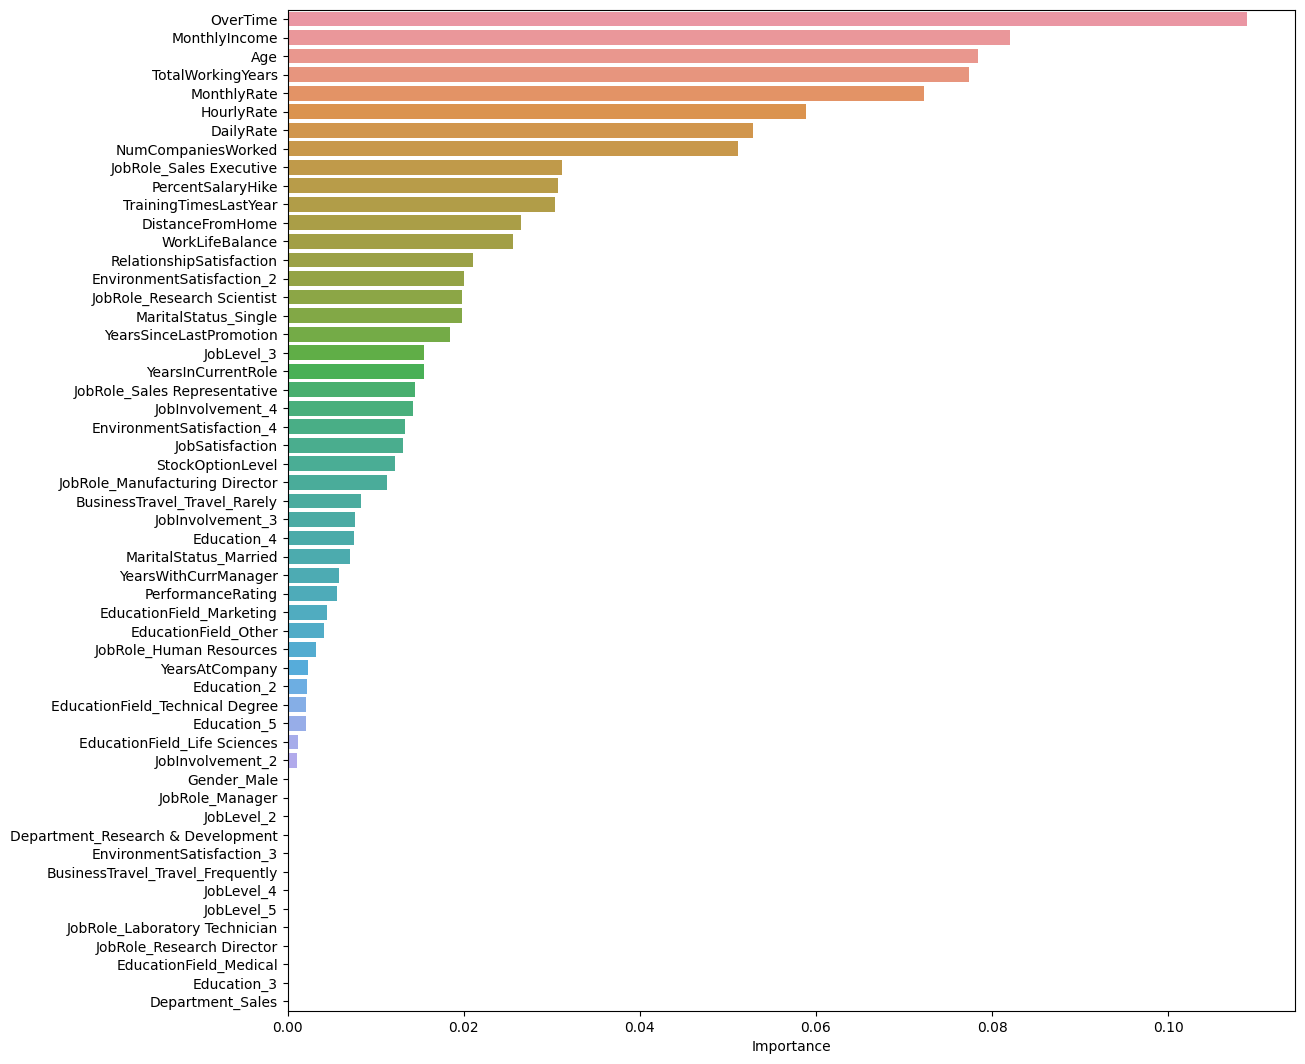

In [38]:
# Plot the feature importance

importances = dt.feature_importances_
columns = X.columns
importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)
plt.figure(figsize = (13, 13))
sns.barplot(data = importance_df, x = importance_df.Importance, y = importance_df.index)

**Observations:**

- According to the Decision Tree, **Overtime is the most important feature, followed by Monthly income, Age, total working years, and MonthlyRate.** 
- This might signify that people who are at risk of attrition have low income, are doing overtime and have less experience. 
- The other important features are `DailyRate`, `NumCompaniesWorked`, `JobRole_Sales Executive`, and `PercentSalaryHike`.

**Let's plot the tree** and check:

As we know the decision tree keeps growing until the nodes are homogeneous, i.e., it has only one class, and the dataset here has a lot of features, it would be hard to visualize the whole tree with so many features. Therefore, we are only visualizing the tree up to **max_depth = 4**.

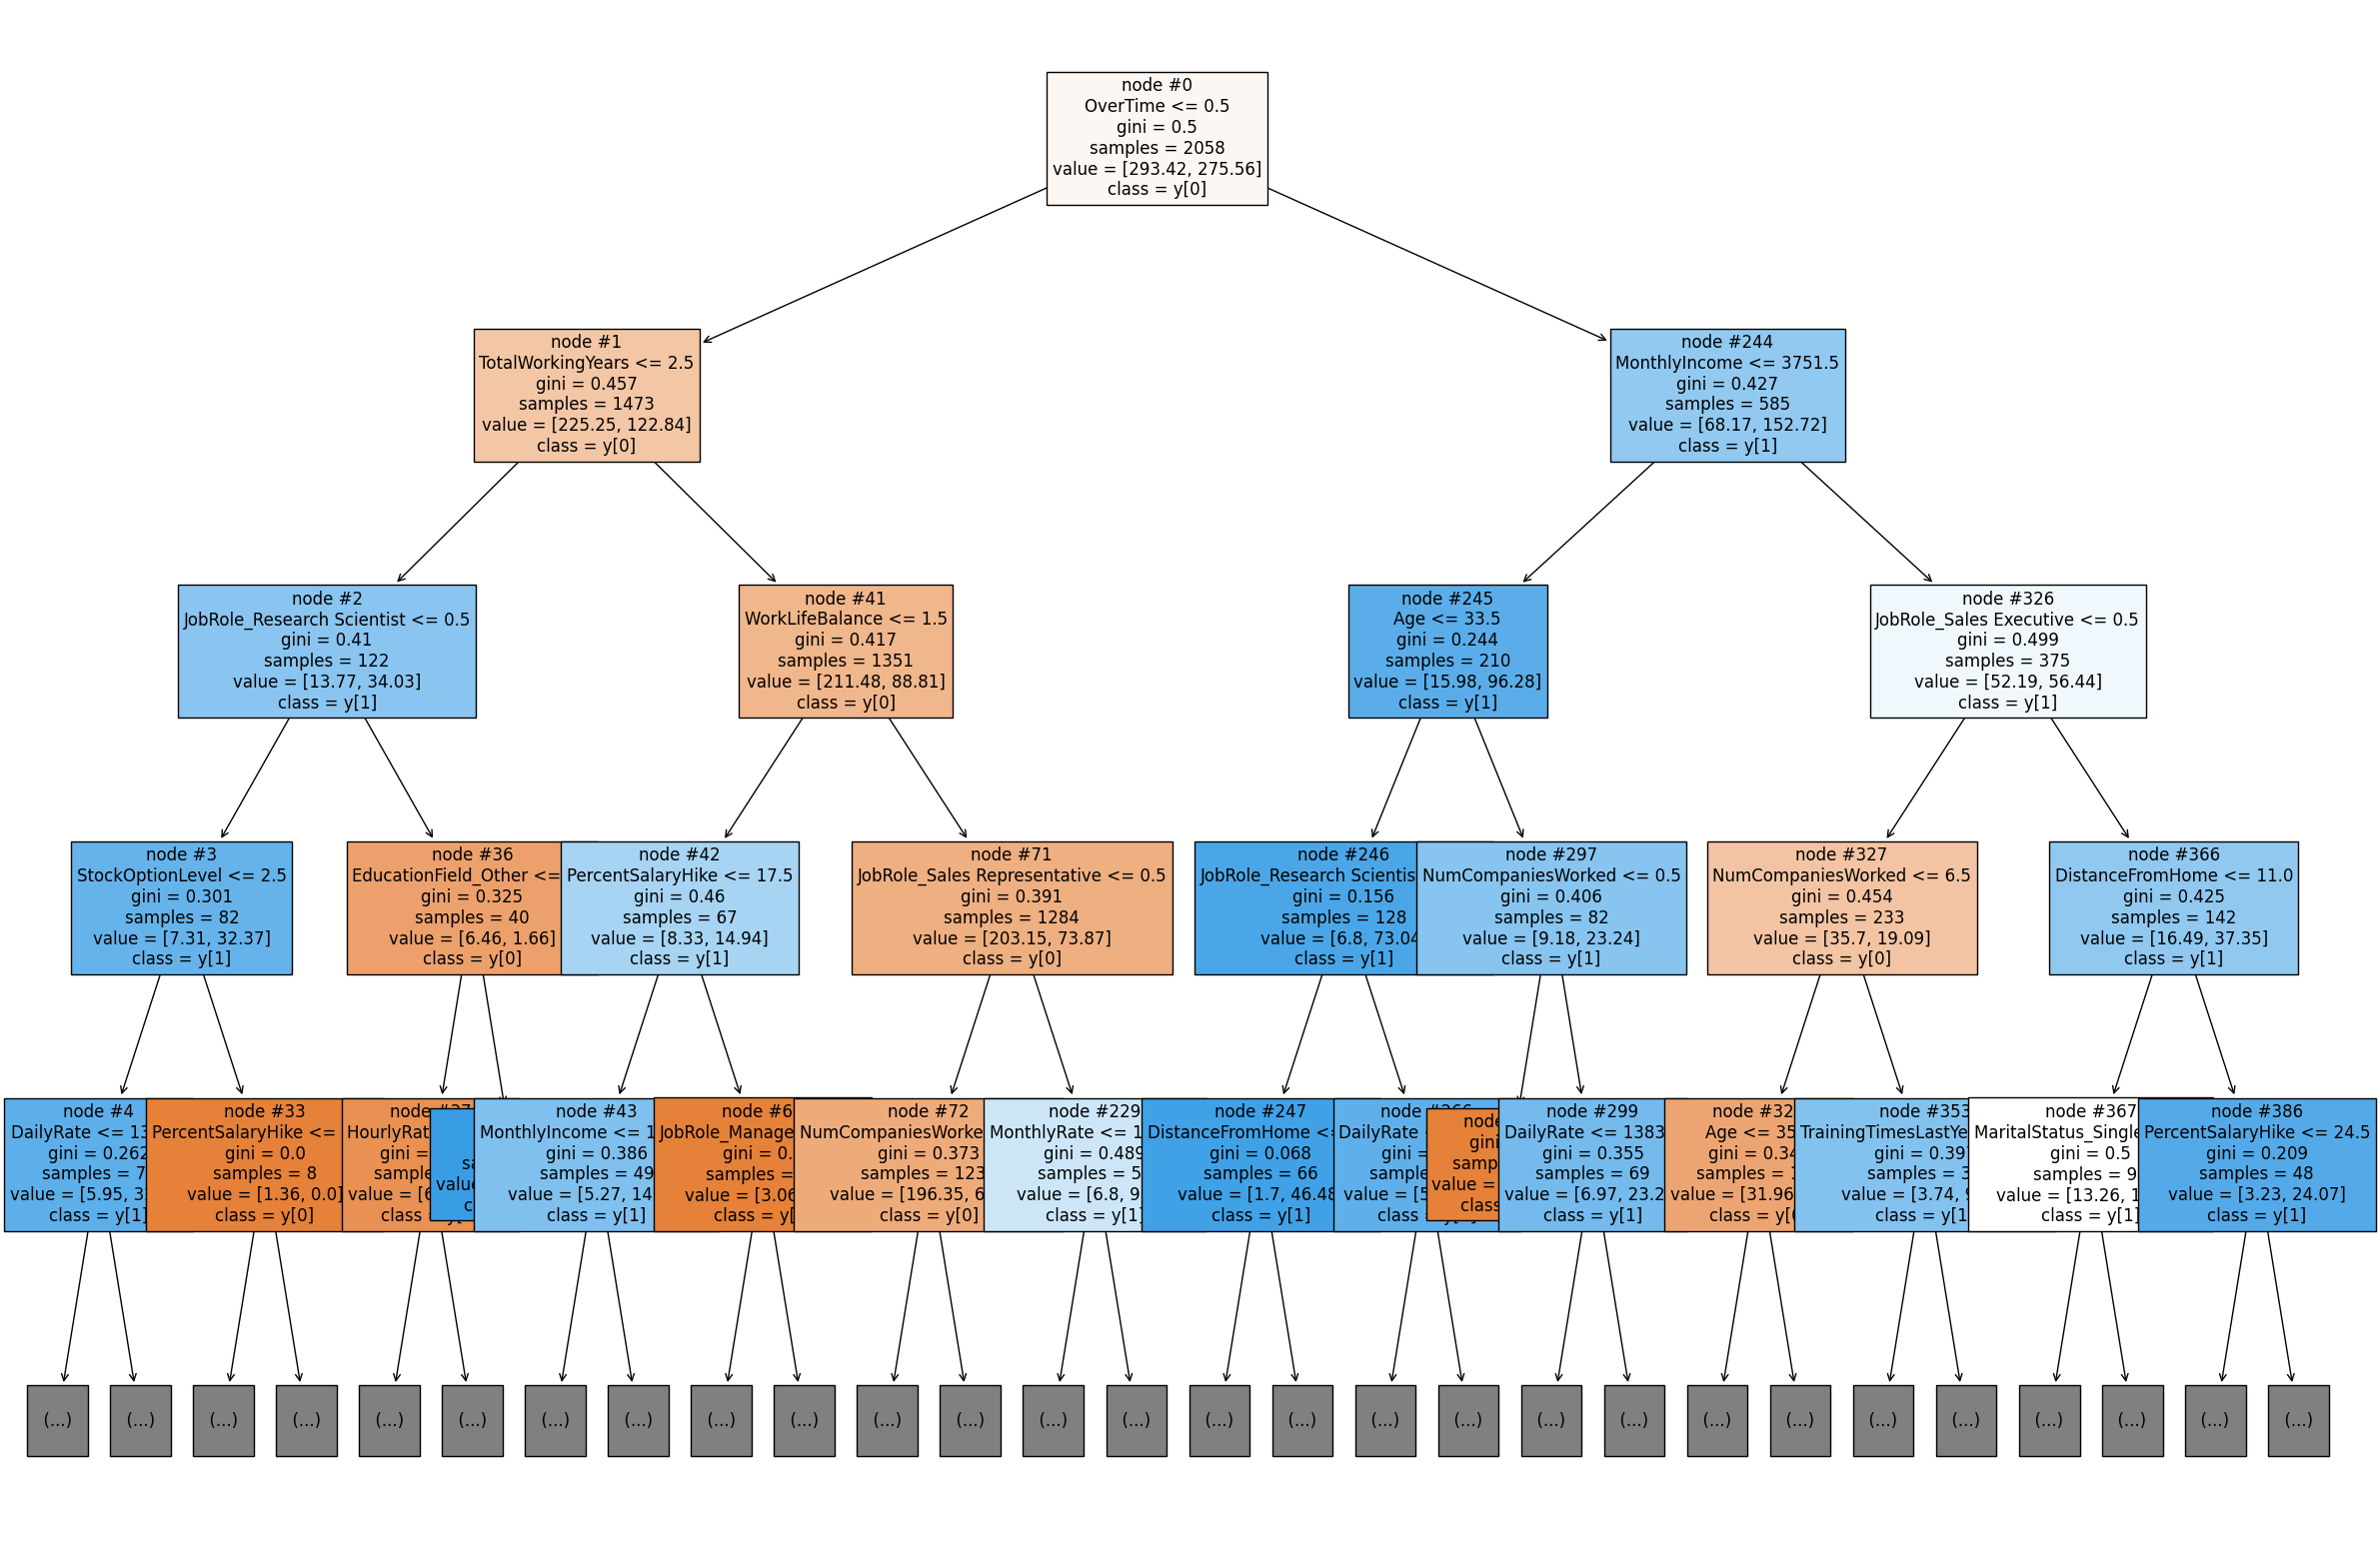

In [39]:
features = list(X.columns)

plt.figure(figsize = (30, 20))

tree.plot_tree(dt, max_depth = 4, feature_names = features, filled = True, fontsize = 12, node_ids = True, class_names = True)

plt.show()

### **Note:**

Blue leaves represent the attrition, i.e., **y[1]** and the orange leaves represent the non-attrition, i.e., **y[0]**. Also, the more the number of observations in a leaf, the darker its color gets.

### **Random Forest**

- **Random Forest is a bagging algorithm where the base models are Decision Trees.** Samples are taken from the training data and on each sample, a decision tree makes a prediction. 
- The results from all the **decision trees** are combined and the final prediction is made using **voting** (for classification problems) or **averaging** (for regression problems).**

In [40]:
# Fitting the Random Forest classifier on the training data
rf_estimator = RandomForestClassifier(class_weight = {0: 0.17, 1: 0.83}, random_state = 1)

rf_estimator.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.17, 1: 0.83}, random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1726
           1       1.00      1.00      1.00       332

    accuracy                           1.00      2058
   macro avg       1.00      1.00      1.00      2058
weighted avg       1.00      1.00      1.00      2058



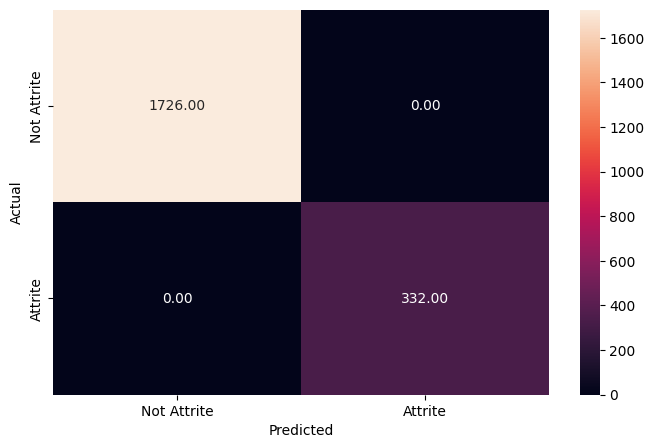

In [41]:
# Checking performance on the training data
y_pred_train_rf = rf_estimator.predict(X_train)

metrics_score(y_train, y_pred_train_rf)

**Observation:**

- For all the metrics in the training dataset, the Random Forest gives a 100% score.

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       740
           1       0.95      0.79      0.86       142

    accuracy                           0.96       882
   macro avg       0.95      0.89      0.92       882
weighted avg       0.96      0.96      0.96       882



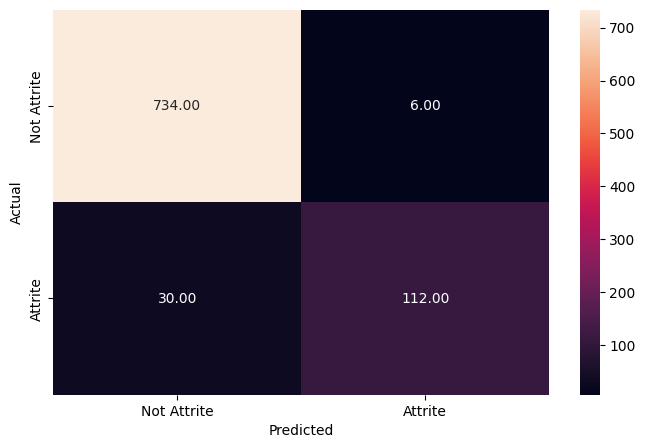

In [42]:
# Checking performance on the testing data
y_pred_test_rf = rf_estimator.predict(X_test)

metrics_score(y_test, y_pred_test_rf)

**Observations:**

- The Random Forest classifier **seems to be overfitting the training data**. The recall on the training data is 1, while the recall on the test data is only ~ 0.80 for class 1.
- Precision is high for the test data as well. 

**Let's check the feature importance of the Random Forest**

<Axes: xlabel='Importance'>

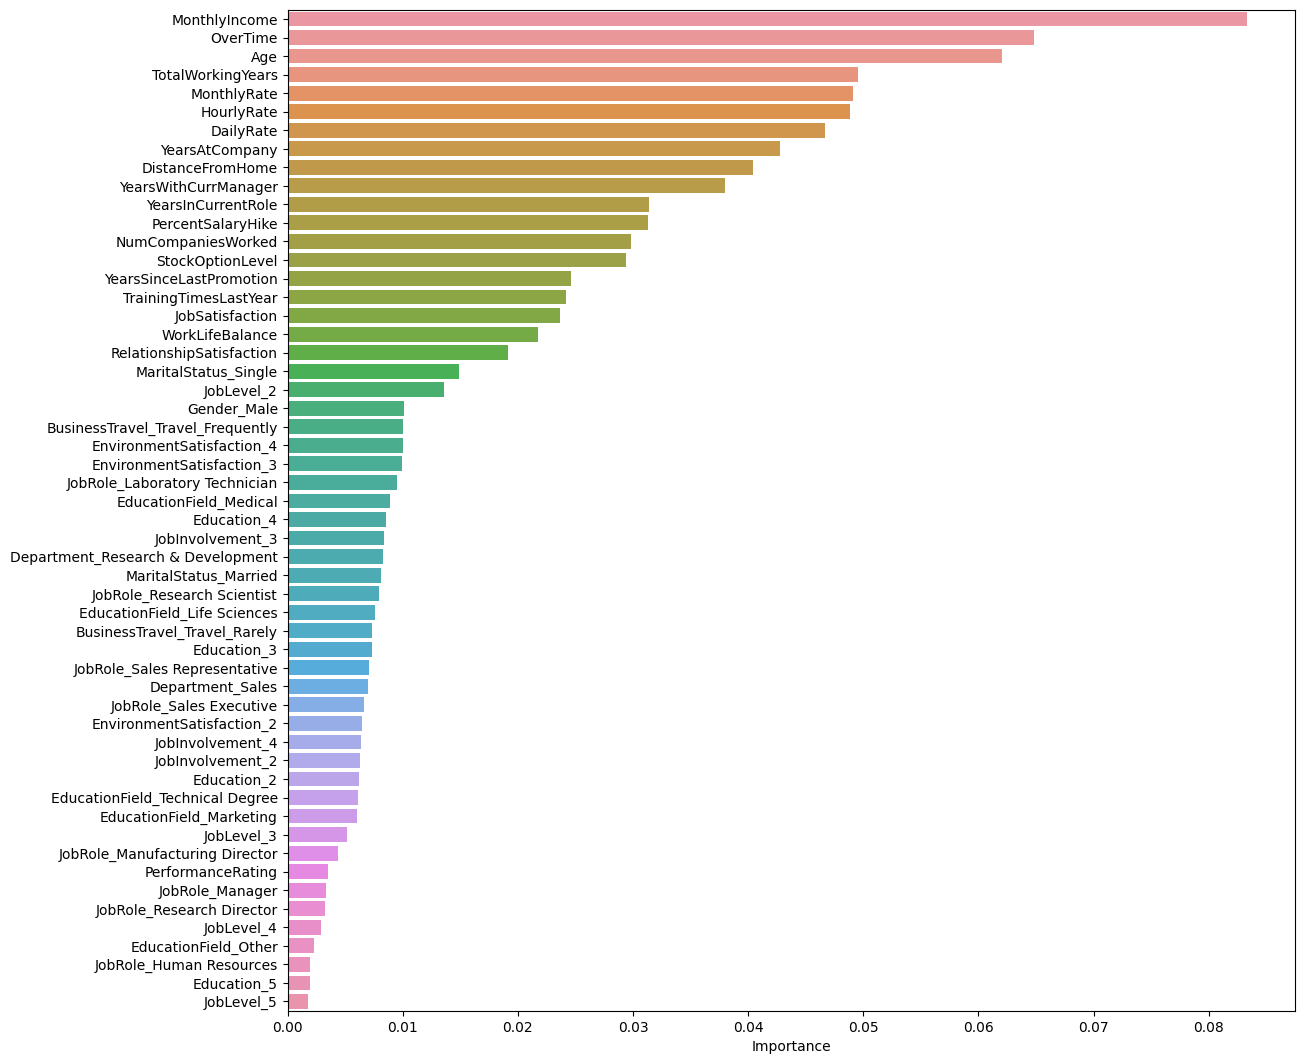

In [43]:
importances = rf_estimator.feature_importances_
columns = X.columns
importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)
plt.figure(figsize = (13, 13))
sns.barplot(data = importance_df, x = importance_df.Importance, y = importance_df.index)

**Observations:**


- The Random Forest further verifies the results from the decision tree that the most important features are `MonthlyIncome`, `Age`, `OverTime`.
- We can say that the people appear to be leaving the organization because of the overtime they are doing and this is because they are not paid accordingly. These might be mostly junior-level and mid-level employees with less experience. 
- Distance from home is also a key feature, probably as employees living far from the office have to travel a lot, making their schedules hectic.
- Not having stock options is also a driver for attrition - this feature seems to have good importance in both the decision tree and random forest models. This could be related to the junior level employees and their lack of stock options - with the additional burden of a lower salary and working overtime, those without stock options could also be attriting more.
- Other features like, number of companies worked and percent salary hike also seem to be intuitive in explaining attrition likelihood, as people who have worked in a large number of companies are probably not going to stay loyal to the current organization and may have a high risk of attrition, while if an employee is not getting enough of a salary hike, that might demotivate them and lead to a higher likelihood of attriting as well.
- Other features such as job satisfaction, environment satisfaction and their job level also play a crucial role in knowing whether an employee will attrite or not.

## **Conclusions:**

- We have tried multiple models and were **able to identify the key factors involved with high attrition** in the organization.
- **SVM with RBF kernel** has good recall among all the models and **Random Forest**, has less recall compared to SVM but F1 Score, Accuracy and Precision values are good in case of Random Forest. It may be possible to further try and tune the model, and the HR department can use this model to predict whether an employee is at risk of attrition or not.

## **Recommendations:**

- We saw that **working overtime is the most important driver of attrition.** The organization should manage their work more efficiently so that employees don't have to work overtime and can manage to have a work-life balance, or failing this, the company could provide some additional incentives to employees who are working overtime in order to retain them.
- The organization should focus on the employees who are working in **sales and marketing** as **the attrition rate is quite high for these departments.** Perhaps the organization could look into their incentive schemes and try to come up with better ideas to retain these employees. 
- As observed earlier, **the organization has a lower percentage salary hike and promotions are given less frequently.** The company might be able to focus on giving promotions more frequently or it can increase the annual appraisal hike to incentivize employees to stay.
- **A higher monthly income might lower the odds of an employee attriting.** The company should make sure that all its employees are compensated at least based on industry standards.
- We observed that **approximately 40% of employees have given a poor rating on job satisfaction and environment satisfaction** , possibly contributing to a higher attrition rate. The organization should focus on improving the culture and environment of the organization by coming up with new ideas to make the office environment more open and friendly.
- **Distance from home is also an important factor for attrition** - employees traveling a greater distance to reach the workplace are more likely to attrite. For such employees, the company could provide shuttle facilities so that the commute for such employees gets easier.
- The data and the model suggest that **lower job involvement leads to a higher likelihood of attrition**. This might be due to a lack of growth opportunities or a poor management style. A more pro-active, hands-on approach may be required from the managers in the organization.
- **Young and relatively new/inexperienced employees tend to show a higher attrition rate.** The organization might be able to keep track of the problems that employees with less experience face in a better manner and come up with better ideas on how the management might help them. This may help create a healthier, more welcoming environment for younger employees.
- The organization could come up with a revised CTC plan that includes stock options for a larger proportion of the employees in order to keep them motivated.

## **Additional Content - Hyperparameter Tuning**

**Hyperparameters** are the parameters that govern the entire training process. Their values are set before the learning process begins. They have a significant effect on the model’s performance. The process of finding optimal hyperparameters for a model is known as **hyperparameter tuning**. Choosing optimal hyperparameters can lead to improvements in the overall model’s performance and can help in reducing both overfitting and underfitting.

###**Types of Hyperparameter Tuning**
Some models consist of a huge number of hyperparameters, and finding the optimal set of hyperparameters can be a very time-consuming process. To make the process efficient, the most commonly used methods are,

*   Grid Search 
*   Random Search


####**Grid Search**

Grid search is a technique used to find the optimal set of hyperparameters for a model from the provided search space.

Let’s understand how grid search works, with an example


![test_image](https://raw.githubusercontent.com/GL-ACADOPS/RS-IMAGES/main/gridsearch.png)



- Let the grey box above be set of all possible hyperparameters
- Let these black circles indicate the search space
- Grid search will iterate over all black circles in a sequence
- And finally gives the best set of hyperparameters based on the best score obtained


Grid Seach doesn’t work well on large search spaces. It will find the best set of hyperparameters but at a high cost. Grid search is best used when we have small search space. We can use a grid search to get the best possible results when we don’t have any time constraints, but when we have time constraints, it’s better to go with the random search.

###**Random Search**

Random Search is another technique to find the best set of hyperparameters which takes lesser time than grid search

Random search is very similar to grid search, the difference is that in the random search,

![test_image](https://raw.githubusercontent.com/GL-ACADOPS/RS-IMAGES/main/randomsearch.png)

Here we will define the number of iterations to search. Not all parameter values are tried out, but rather a fixed number of parameter settings is sampled from the specified distributions. Also, the set of hyperparameters is not searched sequentially. So out of the entire search space of hyperparameters, only a certain number of sets of hyperparameters will be checked randomly.

Random SearchWorks well on large search spaces and gives better results than grid search but it doesn’t guarantee to find the best set of hyperparameters.



### **Tuning Models**
 
We will tune Decision Trees and Random Forest models. For tuning, we will only use Grid Search.

####**Decision Tree**
Please refer to the sklearn link to learn more about the hyperparameters and values that the algorithm can take https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html.



**Here are some of the parameters,**

1) **Criterion{“gini”,  “entropy”}**

The function is to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.

2) **max_depth** 

The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

3) **min_samples_leaf**

The minimum number of samples is required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.

In [44]:
# Choose the type of classifier
dtree_estimator = DecisionTreeClassifier(class_weight = {0: 0.17, 1: 0.83}, random_state = 1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2, 7), 
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [5, 10, 20, 25]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
gridCV = GridSearchCV(dtree_estimator, parameters, scoring = scorer, cv = 10)

# Fitting the grid search on the train data
gridCV = gridCV.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
dtree_estimator = gridCV.best_estimator_

# Fit the best estimator to the data
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.17, 1: 0.83}, max_depth=2,
                       min_samples_leaf=5, random_state=1)

              precision    recall  f1-score   support

           0       0.92      0.72      0.81      1726
           1       0.32      0.68      0.43       332

    accuracy                           0.71      2058
   macro avg       0.62      0.70      0.62      2058
weighted avg       0.82      0.71      0.75      2058



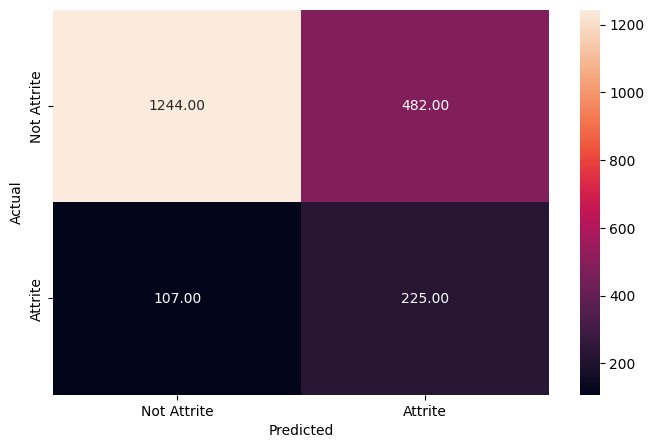

In [45]:
# Checking performance on the training dataset
y_train_pred_dt = dtree_estimator.predict(X_train)

metrics_score(y_train, y_train_pred_dt)

**Observation:**

- In comparison to the model with default values of hyperparameters, **the performance on the training set has gone down significantly.** This makes sense because we are trying to reduce overfitting.

              precision    recall  f1-score   support

           0       0.91      0.71      0.80       740
           1       0.29      0.61      0.39       142

    accuracy                           0.70       882
   macro avg       0.60      0.66      0.59       882
weighted avg       0.81      0.70      0.73       882



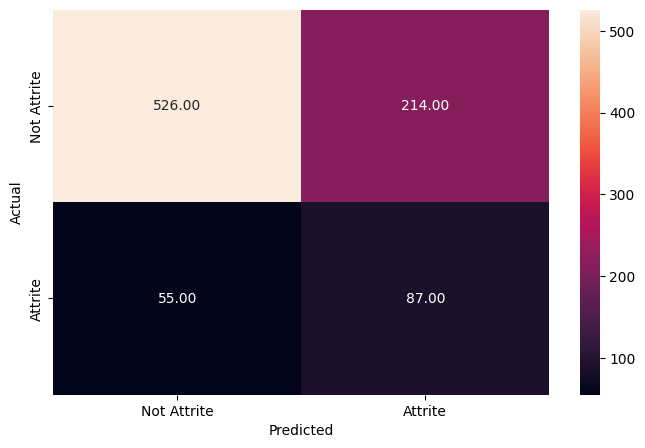

In [46]:
# Checking performance on the test dataset
y_test_pred_dt = dtree_estimator.predict(X_test)

metrics_score(y_test, y_test_pred_dt)

**Observations:**

- The tuned model is not performing well in comparison to the model with default values of hyperparameters.
- This model is not overfitting the training data and gives approximately the same result on the test and train datasets.
- Precision has gone down significantly from .75 to .29 in comparison to the previous model which means the tuned model will give a high number of false positives, i.e., this model will predict the employee is going to leave even if they won't, and this will cost time and effort to the company.

**Let's look at the feature importance of this model and try to analyze why this is happening.**

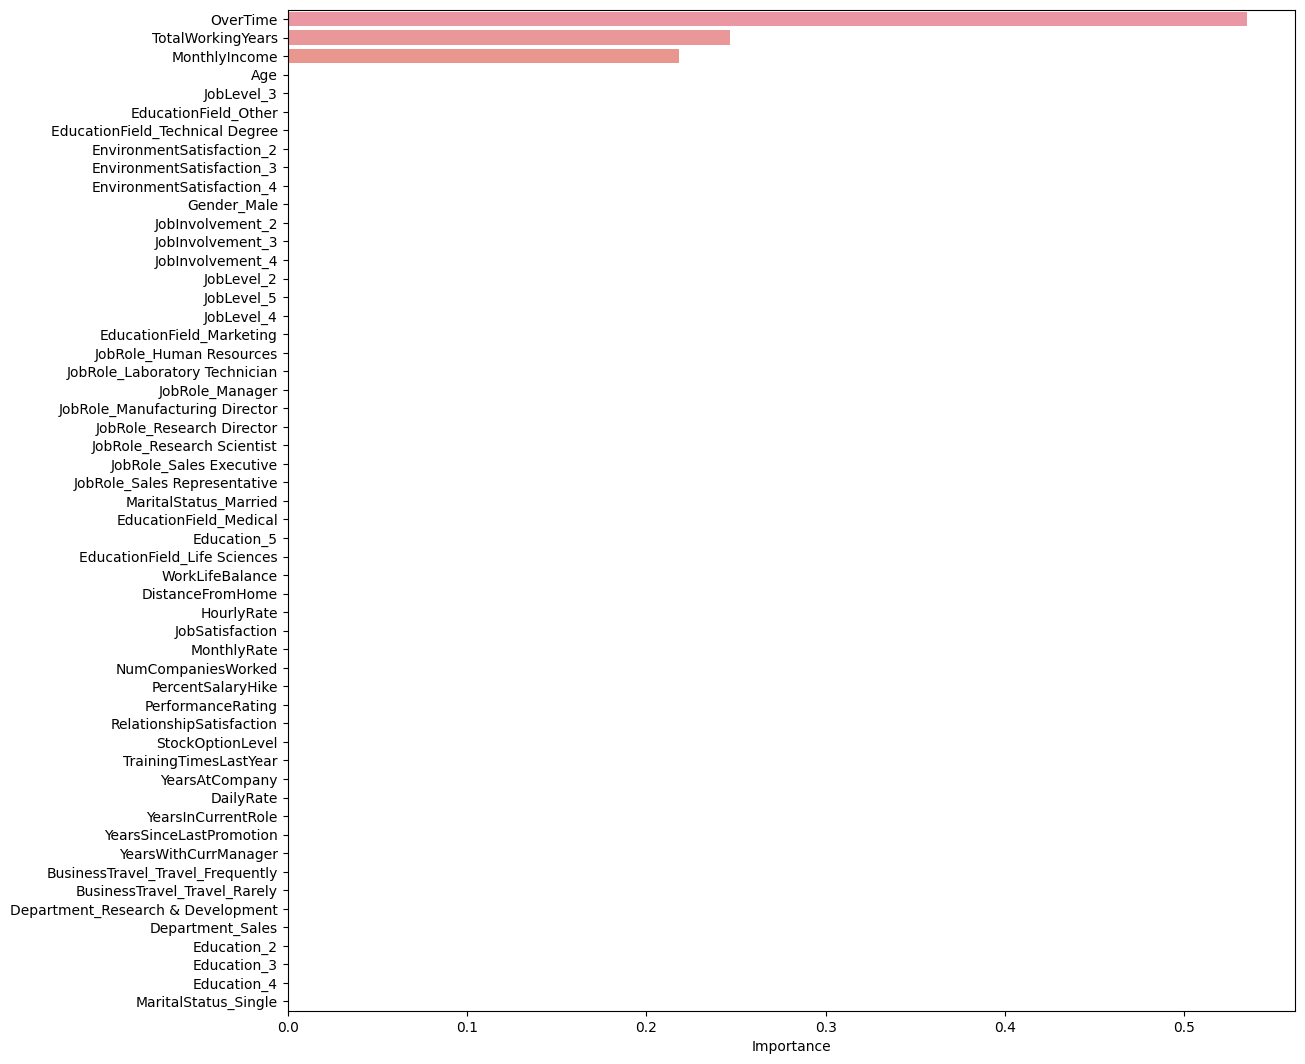

In [47]:
importances = dtree_estimator.feature_importances_
columns = X.columns

importance_df = pd.DataFrame(importances, index=columns, columns=['Importance']).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(13, 13))
sns.barplot(data=importance_df, x='Importance', y=importance_df.index)
plt.show()

**Observations:**

- After tuning the model, we found out that only 3 features are important. It seems like **the model is having high bias**, as it has over-simplified the problem and is not capturing the patterns associated with other variables.
- According to this model too, `OverTime`, `TotalWorkingYears`, and `MonthlyIncome` are the 3 most important features that describe why an employee is leaving the organization, which might imply that employees doing overtime may feel that their remuneration is not enough for their efforts.

#### **Random Forest**

Please refer to the sklearn link to learn more about the parameters and values that the algorithm can take https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html.



**Here are some of the parameters,**

**n_estimators**: The number of trees in the forest.

**min_samples_split**: The minimum number of samples required to split an internal node.

**min_samples_leaf**: The minimum number of samples required to be at a leaf node. 

**max_features{“auto”, “sqrt”, “log2”, 'None'}**: The number of features to consider when looking for the best split.

- If “auto”, then max_features=sqrt(n_features).

- If “sqrt”, then max_features=sqrt(n_features) (same as “auto”).

- If “log2”, then max_features=log2(n_features).

- If None, then max_features=n_features.

In [48]:
# Choose the type of classifier
rf_estimator_tuned = RandomForestClassifier(class_weight = {0: 0.17, 1: 0.83}, random_state = 1)

# Grid of parameters to choose from
params_rf = {  
        "n_estimators": [100, 250, 500],
        "min_samples_leaf": np.arange(1, 4, 1),
        "max_features": [0.7, 0.9, 'auto'],
}


# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, params_rf, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_

In [49]:
rf_estimator_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.17, 1: 0.83}, max_features=0.9,
                       min_samples_leaf=3, n_estimators=250, random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1726
           1       0.99      1.00      1.00       332

    accuracy                           1.00      2058
   macro avg       1.00      1.00      1.00      2058
weighted avg       1.00      1.00      1.00      2058



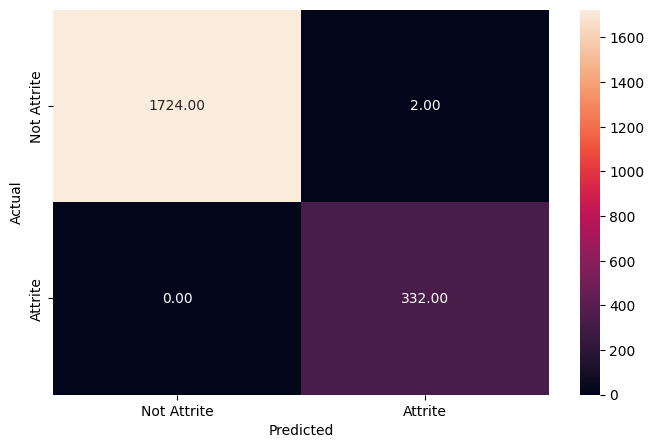

In [50]:
# Checking performance on the training data
y_pred_train_rf_tuned = rf_estimator_tuned.predict(X_train)

metrics_score(y_train, y_pred_train_rf_tuned)

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       740
           1       0.89      0.82      0.85       142

    accuracy                           0.95       882
   macro avg       0.93      0.90      0.91       882
weighted avg       0.95      0.95      0.95       882



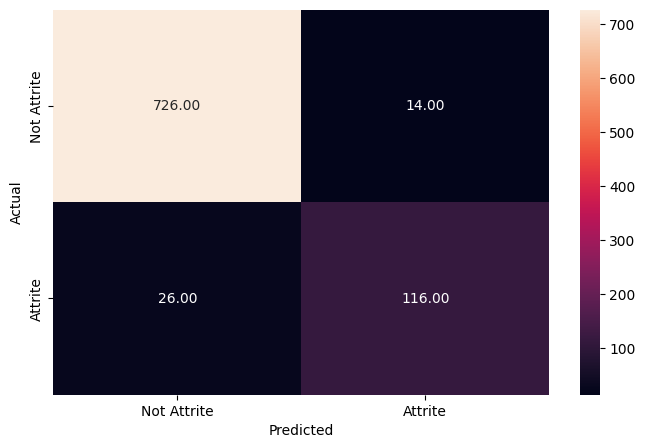

In [51]:
# Checking performance on the test data
y_pred_test_rf_tuned = rf_estimator_tuned.predict(X_test)

metrics_score(y_test, y_pred_test_rf_tuned)

**Observations:**

- The tuned model is also slightly overfitting the training dataset, but **it shows a good performance on the test dataset.**
- **The recall for class 1 has improved with a small decrease in precision**. 
- **This model is the best-performing one among all the models so far,** and is giving us good precision and recall scores on the test dataset.

<Axes: xlabel='Importance'>

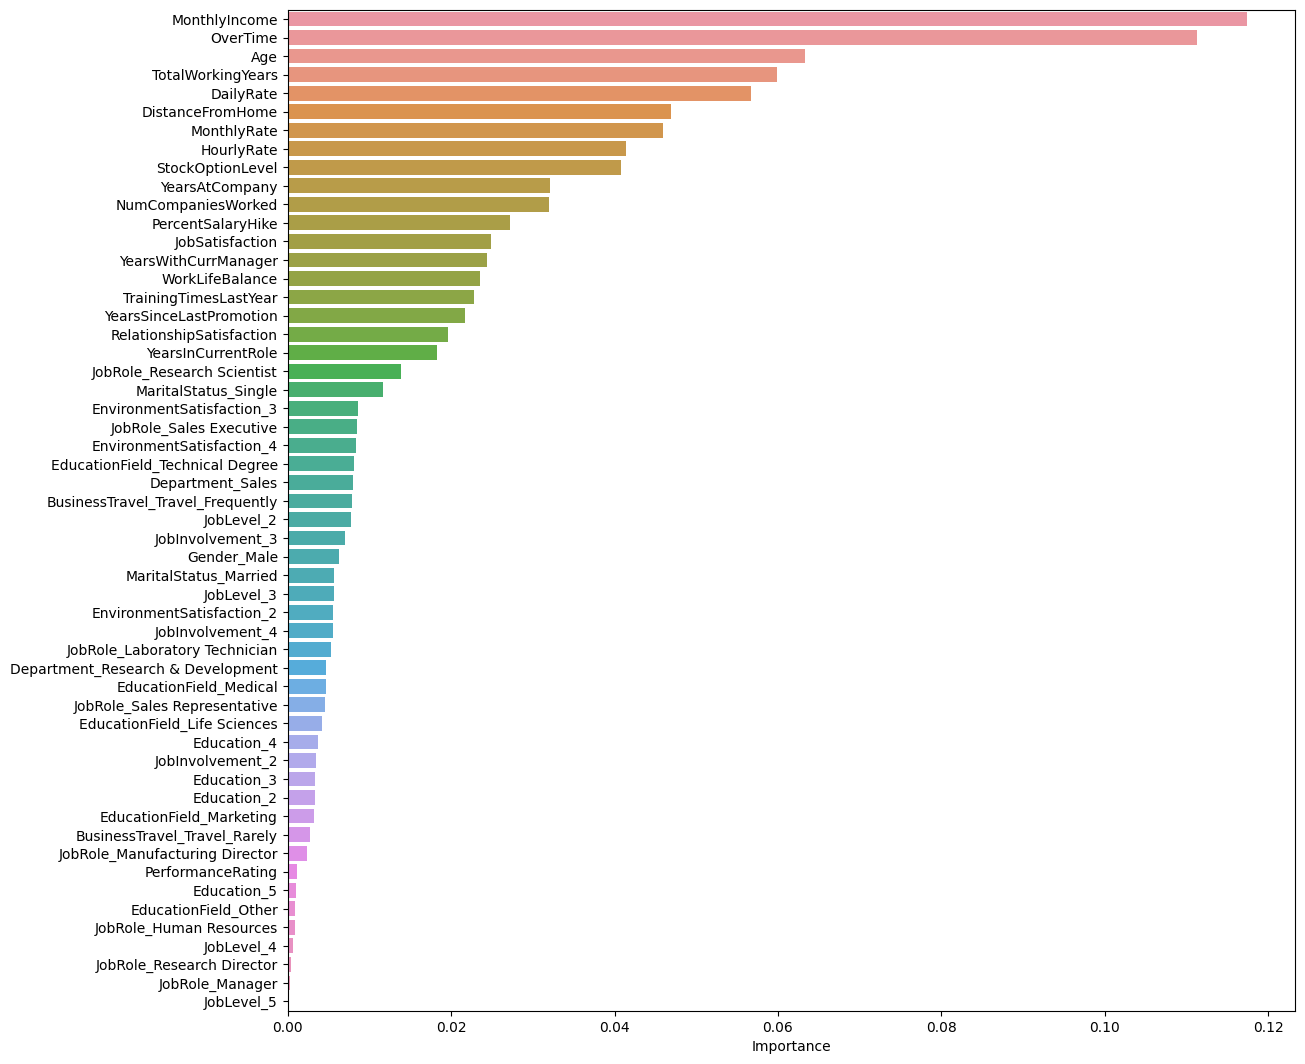

In [52]:
# Plotting feature importance
importances = rf_estimator_tuned.feature_importances_
columns = X.columns
importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)
plt.figure(figsize = (13, 13))
sns.barplot(data = importance_df, x = importance_df.Importance, y = importance_df.index)

**Observations:**

- **The feature importance plot for the base model and tuned model are quite similar.** The model seems to suggest that `OverTime`, `MonthlyIncome`, `Age`,`TotalWorkingYears`, and `DailyRate` are the most important features.
- Other important features are DistanceFromHome, StockOptionLevel, YearsAt Company, and NumCompaniesWorked.

**Happy Learning!**